<a href="https://colab.research.google.com/github/rishabhdikhit/Business-Case-Walmart---Confidence-Interval-and-CLT/blob/main/walmart_ci_and_clt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


![Walmart Logo](https://upload.wikimedia.org/wikipedia/commons/thumb/c/ca/Walmart_logo.svg/768px-Walmart_logo.svg.png)

#Walmart Sales Analysis
## Introduction



Walmart, founded in 1962 by Sam Walton, is a retail giant and one of the world's largest and most influential companies. Headquartered in Bentonville, Arkansas, this American multinational corporation has established itself as a global powerhouse in the retail industry. Walmart operates a vast network of hypermarkets, discount department stores, and grocery stores under various brand names across the United States and in numerous countries around the world.

## Objective

The objective of this project is to conduct a comprehensive analysis of customer purchase behavior, with a specific focus on purchase amounts in relation to customer gender during the Black Friday sales event at Walmart Inc. This study aims to provide valuable insights that can assist the management team at Walmart Inc. in making data-driven decisions.

## Data Overview

The company collected transactional data of customers who purchased products from Walmart stores during Black Friday, comprising around 0.5 million transactions over various years. The dataset includes features such as User ID, Product ID, Gender, Age, Occupation, City Category, Stay in Current City Years, Marital Status, Product Category, and Purchase Amount.

# EDA (Exploratory Data Analysis)

In [106]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
%matplotlib inline

In [107]:
df=pd.read_csv("/content/walmart_data.csv")
df.head(7)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969
5,1000003,P00193542,M,26-35,15,A,3,0,1,15227
6,1000004,P00184942,M,46-50,7,B,2,1,1,19215


In [108]:
df.shape

(550068, 10)

In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


In [110]:
for col in df.columns[:-1]:
    df[col] = df[col].astype("category")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype   
---  ------                      --------------   -----   
 0   User_ID                     550068 non-null  category
 1   Product_ID                  550068 non-null  category
 2   Gender                      550068 non-null  category
 3   Age                         550068 non-null  category
 4   Occupation                  550068 non-null  category
 5   City_Category               550068 non-null  category
 6   Stay_In_Current_City_Years  550068 non-null  category
 7   Marital_Status              550068 non-null  category
 8   Product_Category            550068 non-null  category
 9   Purchase                    550068 non-null  int64   
dtypes: category(9), int64(1)
memory usage: 10.3 MB


In [111]:
df.describe()

,Purchase
count,550068.000000
mean,9263.968713
std,5023.065394
min,12.000000
25%,5823.000000
50%,8047.000000
75%,12054.000000
max,23961.000000


OBSERVATIONS

The purchase amounts vary widely, with the minimum recorded purchase being $12$ and the maximum reaching $23961$. The median purchase amount of $8047$ is notably lower than the mean purchase amount of $9264$, indicating a right-skewed distribution where a few high-value purchases pull up the mean

In [112]:
df.describe(include ="category")

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category
count,550068,550068,550068,550068,550068,550068,550068,550068,550068
unique,5891,3631,2,7,21,3,5,2,20
top,1001680,P00265242,M,26-35,4,B,1,0,5
freq,1026,1880,414259,219587,72308,231173,193821,324731,150933


OBSERVATIONS

1. User_ID - Among 5,50,068 transactions there are 5891 unique user_id, indicating same customers buying multiple products.

2. Product_ID - Among 5,50,068 transactions there are 3631 unique products,with the product having the code P00265242 being the highest seller, with a maximum of 1,880 units sold.

3. Gender - Out of 5,50,068 transactions, 4,14,259 (nearly 75%) were done by male gender indicating a significant disparity in purchase behavior between males and females during the Black Friday event.

4. Age - We have 7 unique age groups in the dataset. 26 - 35 Age group has maximum of 2,19,587 transactions. We will analyse this feature in detail in future

5. Stay_In_Current_City_Years - Customers with 1 year of stay in current city accounted to maximum of 1,93,821 transactions among all the other customers with (0,2,3,4+) years of stay in current city

6. Marital_Status - 59% of the total transactions were done by Unmarried Customers and 41% by Married Customers.

In [113]:
#finding unique values
df.nunique()

User_ID                        5891
Product_ID                     3631
Gender                            2
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category                 20
Purchase                      18105
dtype: int64

In [114]:
df.Age.unique()

['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25']
Categories (7, object): ['0-17', '18-25', '26-35', '36-45', '46-50', '51-55', '55+']

In [115]:
df.Marital_Status.unique()

[0, 1]
Categories (2, int64): [0, 1]

In [116]:
df.Stay_In_Current_City_Years.unique()

['2', '4+', '3', '1', '0']
Categories (5, object): ['0', '1', '2', '3', '4+']

In [117]:
#converting marital status for 0,1 to unmarried and married respectively
df["Marital_Status"] = df["Marital_Status"].apply(lambda x :"Unmarried" if x==0 else "Married")

In [118]:
df.head(7)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,Unmarried,3,8370
1,1000001,P00248942,F,0-17,10,A,2,Unmarried,1,15200
2,1000001,P00087842,F,0-17,10,A,2,Unmarried,12,1422
3,1000001,P00085442,F,0-17,10,A,2,Unmarried,12,1057
4,1000002,P00285442,M,55+,16,C,4+,Unmarried,8,7969
5,1000003,P00193542,M,26-35,15,A,3,Unmarried,1,15227
6,1000004,P00184942,M,46-50,7,B,2,Married,1,19215


In [119]:
#Univariate analysis

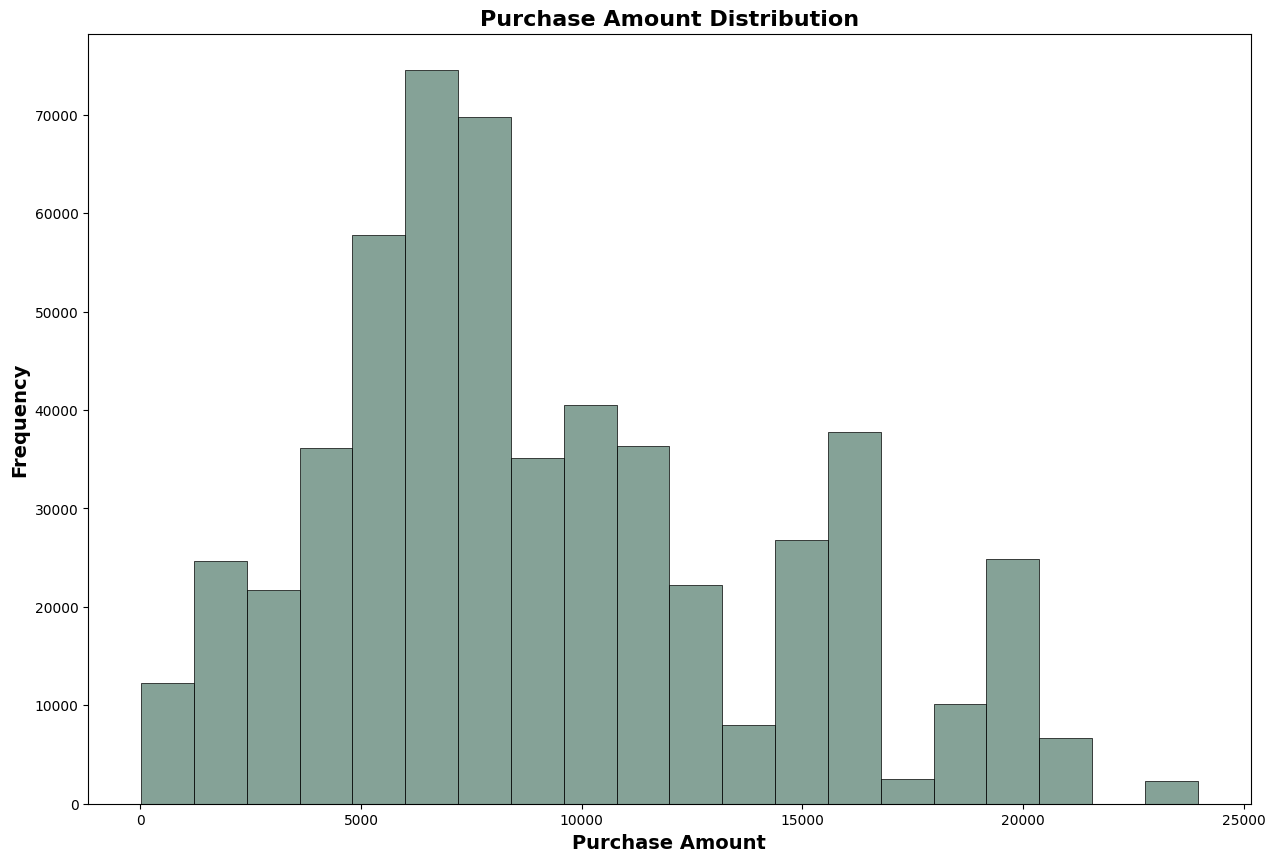

In [120]:
#NUMERICAL ANALYSIS
fig = plt.figure(figsize = (15,10))
sns.histplot(df["Purchase"],color= '#5C8374',linewidth=0.5, edgecolor='black',bins = 20)
plt.title("Purchase Amount Distribution",fontsize = 16,fontweight = 'bold')
plt.xlabel('Purchase Amount',fontsize = 14,fontweight = 'bold')
plt.ylabel('Frequency',fontsize = 14,fontweight = 'bold')
plt.show()

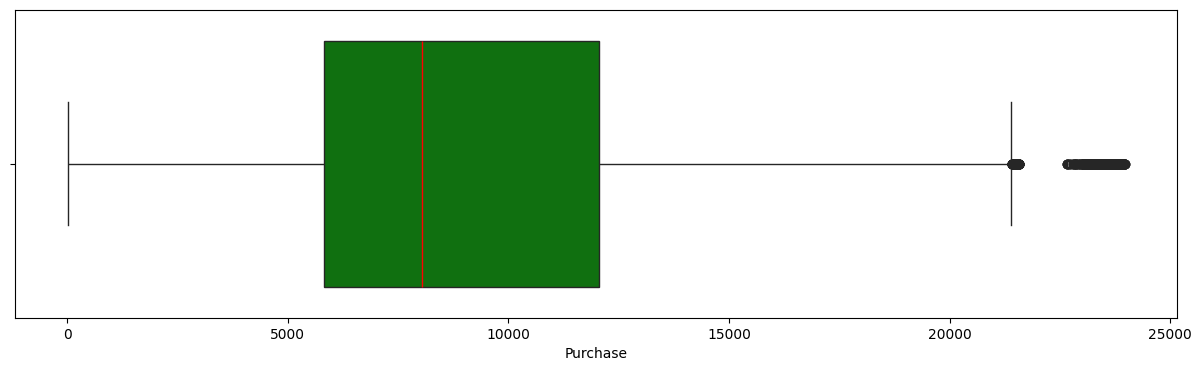

In [121]:
fig = plt.figure(figsize = (15,4))
boxplot=sns.boxplot(df["Purchase"],orient="h",color="green", medianprops=dict(color="red"))
# plt.artists[0].set_facecolor('#5C8374')  # Set face color of the box
# plt.lines[4].set_color('red')
plt.show()

In [122]:
#finding IQR
q3 = df["Purchase"].quantile(0.75)
q1 = df["Purchase"].quantile(0.25)
purchase_iqr = q3 - q1
print("Inter Quartile Range (IQR) of Purchase is", purchase_iqr)
print("75percentile: ",q3)
print("25percentile: ",q1)


Inter Quartile Range (IQR) of Purchase is 6231.0
75percentile:  12054.0
25percentile:  5823.0


In [123]:
#checking for outliers
lower_fence = q1 - 1.5 * purchase_iqr
# Calculate the upper fence
upper_fence = q3 + 1.5 * purchase_iqr
# Identify outliers
outliers = df[(df['Purchase'] < lower_fence) | (df['Purchase'] > upper_fence)]
outliers

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
343,1000058,P00117642,M,26-35,2,B,3,Unmarried,10,23603
375,1000062,P00119342,F,36-45,3,A,1,Unmarried,10,23792
652,1000126,P00087042,M,18-25,9,B,1,Unmarried,10,23233
736,1000139,P00159542,F,26-35,20,C,2,Unmarried,10,23595
1041,1000175,P00052842,F,26-35,2,B,1,Unmarried,10,23341
...,...,...,...,...,...,...,...,...,...,...
544488,1005815,P00116142,M,26-35,20,B,1,Unmarried,10,23753
544704,1005847,P00085342,F,18-25,4,B,2,Unmarried,10,23724
544743,1005852,P00202242,F,26-35,1,A,0,Married,10,23529
545663,1006002,P00116142,M,51-55,0,C,1,Married,10,23663


OBSERVATIONS

Outliers

- There are total of 2677 outliers which is roughly 0.48% of the total data present in purchase amount. We will not remove them as it indicates a broad range of spending behaviors during the sale, highlighting the importance of tailoring marketing strategies to both regular and high-value customers to maximize revenue.

Distribution
- Data suggests that the majority of customers spent between 5,823 USD and 12,054 USD, with the median purchase amount being 8,047 USD.
- The lower limit of 12 USD while the upper limit of 21,399 USD reveal significant variability in customer spending

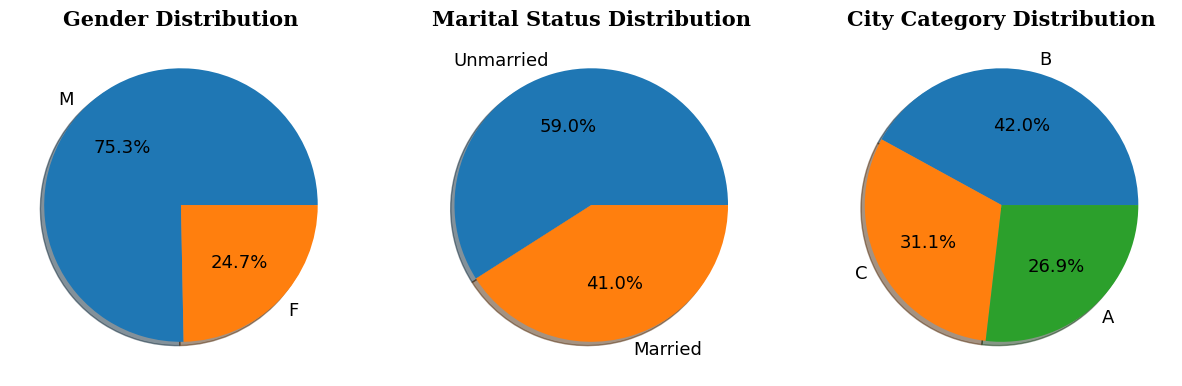

In [124]:
#CATEGORICAL ANALYSIS
fig = plt.figure(figsize = (15,10))
gs = fig.add_gridspec(1,3)
# gender Distribution
a0 = fig.add_subplot(gs[0,0])
a0.pie(df['Gender'].value_counts().values,labels = df['Gender'].value_counts().index,autopct = '%.1f%%',
       shadow = True,textprops={'fontsize': 13, 'color': 'black'})
a0.set_title('Gender Distribution',{'font':'serif', 'size':15,'weight':'bold'})

#Marital_Status Distribution

a1 = fig.add_subplot(gs[0,1])
a1.pie(df['Marital_Status'].value_counts().values,labels = df['Marital_Status'].value_counts().index,autopct = '%.1f%%',
       shadow = True,textprops={'fontsize': 13, 'color': 'black'})
a1.set_title('Marital Status Distribution',{'font':'serif', 'size':15,'weight':'bold'})

#City_Category distribution
a2 = fig.add_subplot(gs[0,2])
a2.pie(df['City_Category'].value_counts().values,labels = df['City_Category'].value_counts().index,autopct = '%.1f%%',
       shadow = True,textprops={'fontsize': 13, 'color': 'black'})
a2.set_title('City Category Distribution',{'font':'serif', 'size':15,'weight':'bold'})
plt.show()


OBSERVATIONS

1. Gender Distribution - Data indicates a significant disparity in purchase behavior between males and females during the Black Friday event.

2. Marital Status - Given that unmarried customers account for a higher percentage of transactions, it may be worthwhile to consider specific marketing campaigns or promotions that appeal to this group.

3. City Category - City B saw the most number of transactions followed by City C and City A respectively

<ipython-input-125-547d65c47057>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = x_axis, y = y_axis,palette=color_map)


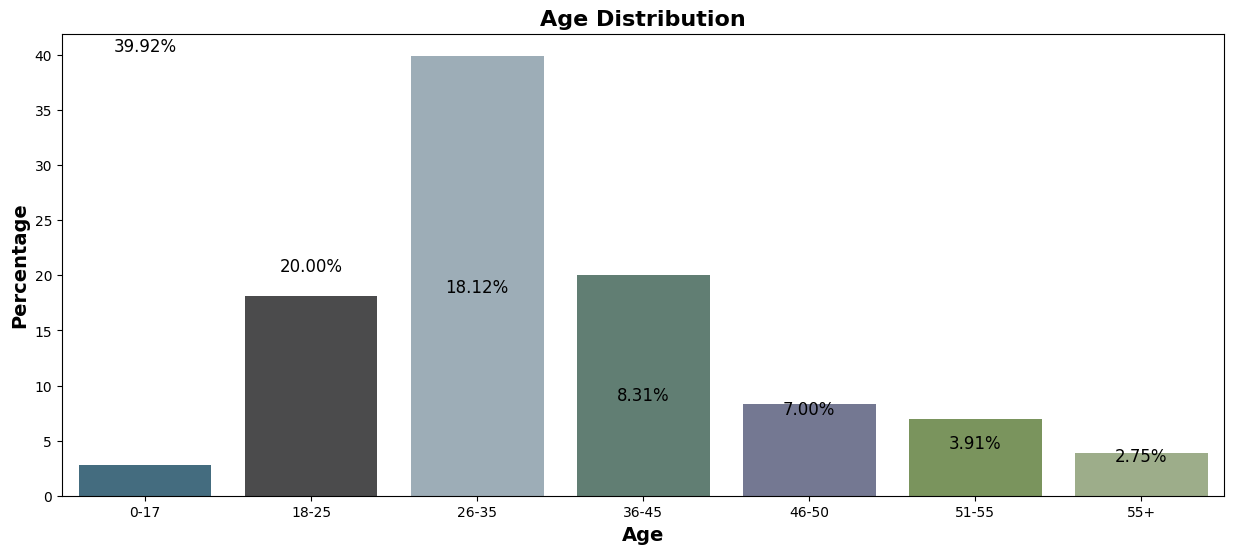

In [125]:
fig = plt.figure(figsize = (15,6))
color_map = ["#3A7089", "#4b4b4c",'#99AEBB','#5C8374','#6F7597','#7A9D54','#9EB384']

# age bin distribution
x_value = df["Age"].value_counts()
x = (df["Age"].value_counts(normalize = True)*100).round(2)
x_axis = x.index
y_axis = x.values
plt.title("Age Distribution",fontsize = 16,fontweight = 'bold')
sns.barplot(x = x_axis, y = y_axis,palette=color_map)
#  Annotate each bar with its percentage value
for i in range(len(x)):
    plt.text(i, y_axis[i], f'{y_axis[i]:.2f}%', ha='center', va='bottom',fontsize = 12)

plt.xlabel('Age',fontsize = 14,fontweight = 'bold')
plt.ylabel('Percentage',fontsize = 14,fontweight = 'bold')
plt.show()

OBSERVATIONS

- The age group of 26-35 represents the largest share of Walmart's Black Friday sales, accounting for 40% of the sales. This suggests that the young and middle-aged adults are the most active and interested in shopping for deals and discounts.

- The 36-45 and 18-25 age groups are the second and third largest segments, respectively, with 20% and 18% of the sales. This indicates that Walmart has a diverse customer base that covers different life stages and preferences..

- The 46-50, 51-55, 55+, and 0-17 age groups are the smallest customer segments, with less than 10% of the total sales each. This implies that Walmart may need to improve its marketing strategies and product offerings to attract more customers from these age groups, especially the seniors and the children.

<ipython-input-126-a41cf69290c4>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = x_axis, y = y_axis,palette=color_map)
<ipython-input-126-a41cf69290c4>:9: UserWarning: The palette list has more values (7) than needed (5), which may not be intended.
  sns.barplot(x = x_axis, y = y_axis,palette=color_map)


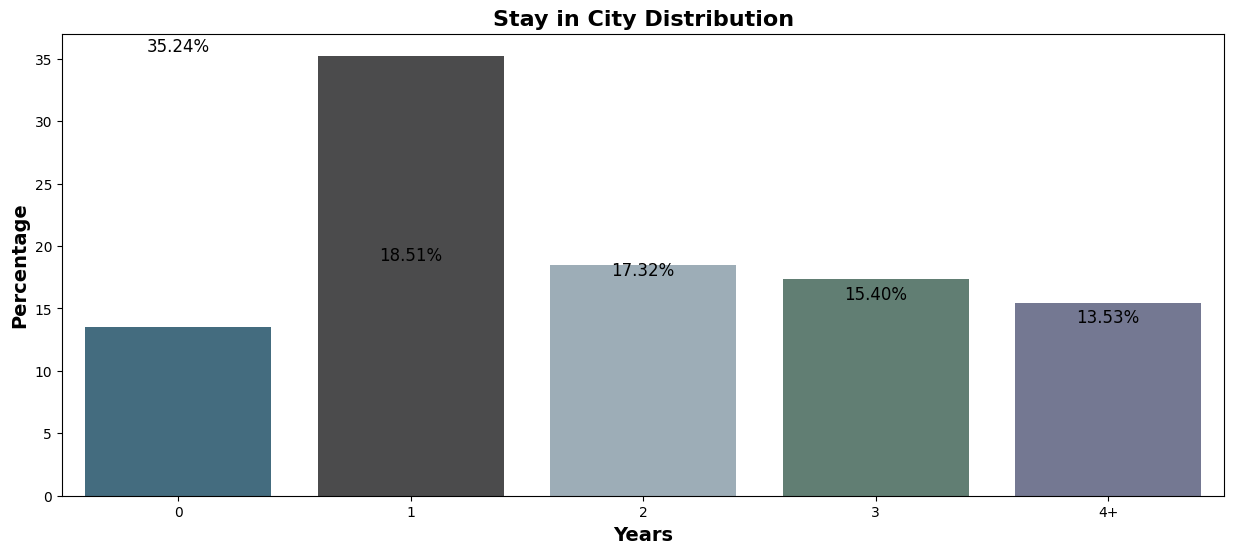

In [126]:
# Customer Stay In current City Year Distribution
fig = plt.figure(figsize = (15,6))
color_map = ["#3A7089", "#4b4b4c",'#99AEBB','#5C8374','#6F7597','#7A9D54','#9EB384']

x = (df["Stay_In_Current_City_Years"].value_counts(normalize = True)*100).round(2)
x_axis = x.index
y_axis = x.values
plt.title("Stay in City Distribution",fontsize = 16,fontweight = 'bold')
sns.barplot(x = x_axis, y = y_axis,palette=color_map)
#  Annotate each bar with its percentage value
for i in range(len(x)):
    plt.text(i, y_axis[i], f'{y_axis[i]:.2f}%', fontsize = 12, ha='center', va='bottom')

plt.xlabel('Years',fontsize = 14,fontweight = 'bold')
plt.ylabel('Percentage',fontsize = 14,fontweight = 'bold')
plt.show()

OBSERVATIONS

- The data suggests that the customers are either new to the city or move frequently, and may have different preferences and needs than long-term residents.

- The majority of the customers (49%) have stayed in the current city for one year or less. This suggests that Walmart has a strong appeal to newcomers who may be looking for affordable and convenient shopping options.

- 4+ years category (14%) customers indicates that Walmart has a loyal customer base who have been living in the same city for a long time.

- The percentage of customers decreases as the stay in the current city increases which suggests that Walmart may benefit from targeting long-term residents for loyalty programs and promotions.

<ipython-input-127-2a9ae4147bf5>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df,x=df["Product_Category"],palette = "Paired")


<Axes: xlabel='Product_Category', ylabel='count'>

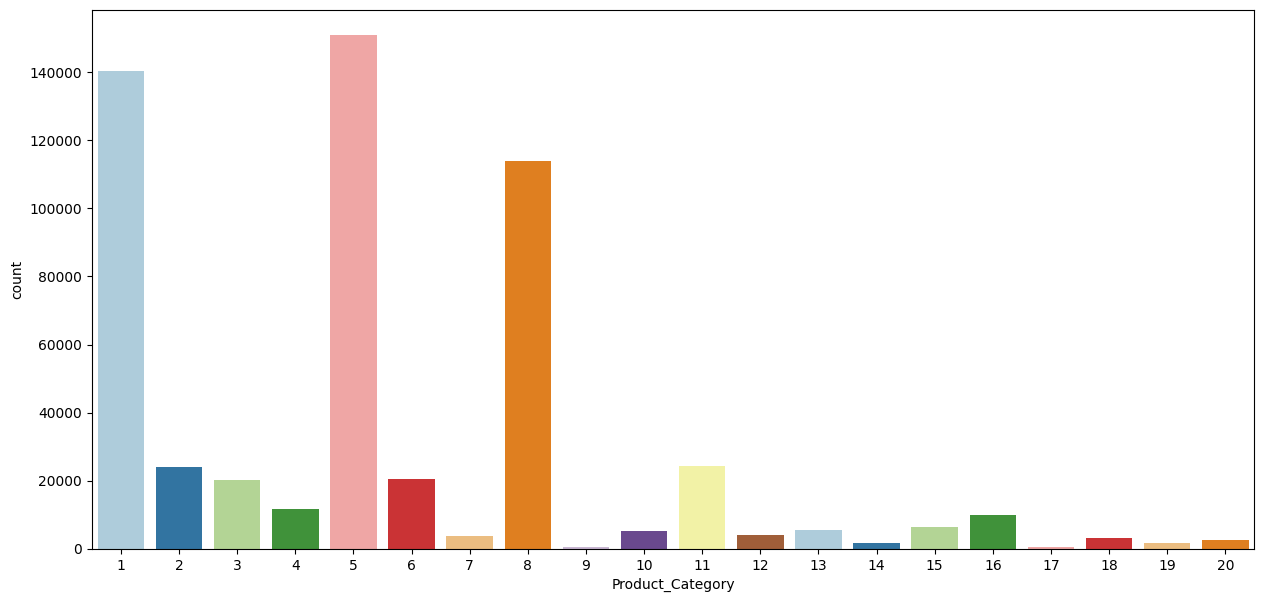

In [127]:
#top product category #5C8374
fig = plt.figure(figsize = (15,7))

# z = df["Product_Category"].value_counts().sort_values(ascending =False).reset_index()
sns.countplot(data=df,x=df["Product_Category"],palette = "Paired")



Text(0.5, 1.0, 'Top 10 Product_ID with Maximum Sales')

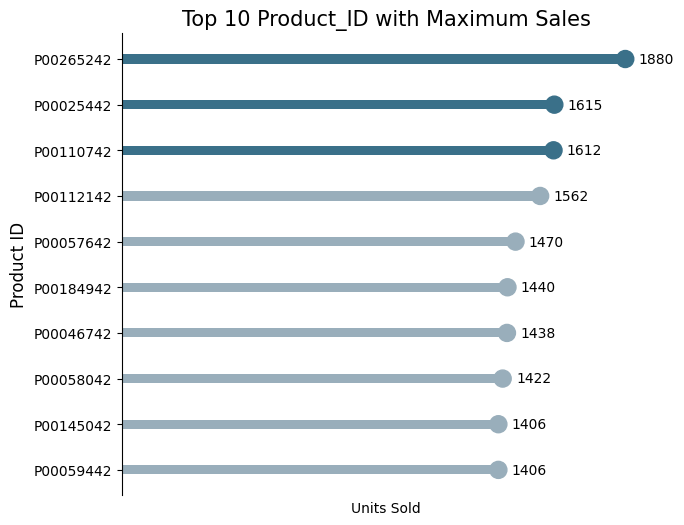

In [128]:
fig = plt.figure(figsize = (15,6))
gs = fig.add_gridspec(1,2)

 #Top 10 Product_ID Sales

ax = fig.add_subplot(gs[0,0])

temp = df['Product_ID'].value_counts()[0:10]

# reversing the list
temp = temp.iloc[-1:-11:-1]

color_map =  ['#99AEBB' for i in range(7)] + ["#3A7089" for i in range(3)]
#creating the plot
ax.barh(y = temp.index,width = temp.values,height = 0.2,color = color_map)
ax.scatter(y = temp.index, x = temp.values, s = 150 , color = color_map )

#removing x-axis
ax.set_xticks([])

#adding label to each bar
for y,x in zip(temp.index,temp.values):
    ax.text( x +50 , y , x,fontsize=10,va='center')

#removing the axis lines
for s in ['top','bottom','right']:
    ax.spines[s].set_visible(False)

#adding axis labels
ax.set_xlabel('Units Sold', fontsize=10)
ax.set_ylabel('Product ID',fontsize = 12)

#creating the title
ax.set_title('Top 10 Product_ID with Maximum Sales',fontsize=15)

OBSERVATIONS

1. Top 10 Products Sold - The top-selling products during Walmart's Black Friday sales are characterized by a relatively small variation in sales numbers, suggesting that Walmart offers a variety of products that many different customers like to buy.

2. Top 10 Product Categories - Categories 5,1 and 8 have significantly outperformed other categories with combined Sales of nearly 75% of the total sales suggesting a strong preference for these products among customers

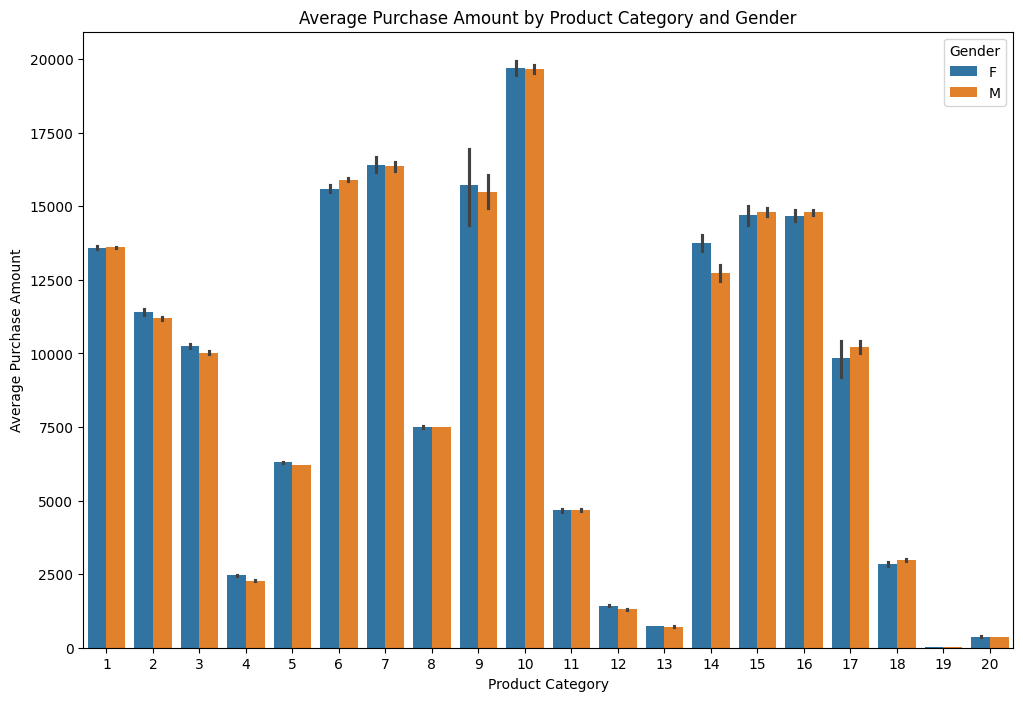

In [129]:
#Product Category, gender, purchase amount
plt.figure(figsize=(12, 8))
sns.barplot(data=df, x='Product_Category', y='Purchase', hue='Gender')
plt.title('Average Purchase Amount by Product Category and Gender')
plt.xlabel('Product Category')
plt.ylabel('Average Purchase Amount')
plt.legend(title='Gender')
plt.show()

                  Occupation  Product_Category  Purchase
Occupation          1.000000         -0.007618  0.020833
Product_Category   -0.007618          1.000000 -0.343703
Purchase            0.020833         -0.343703  1.000000


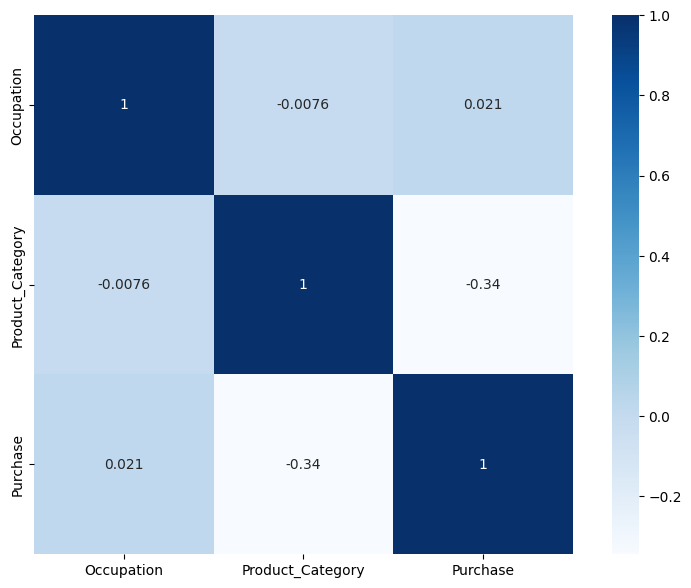

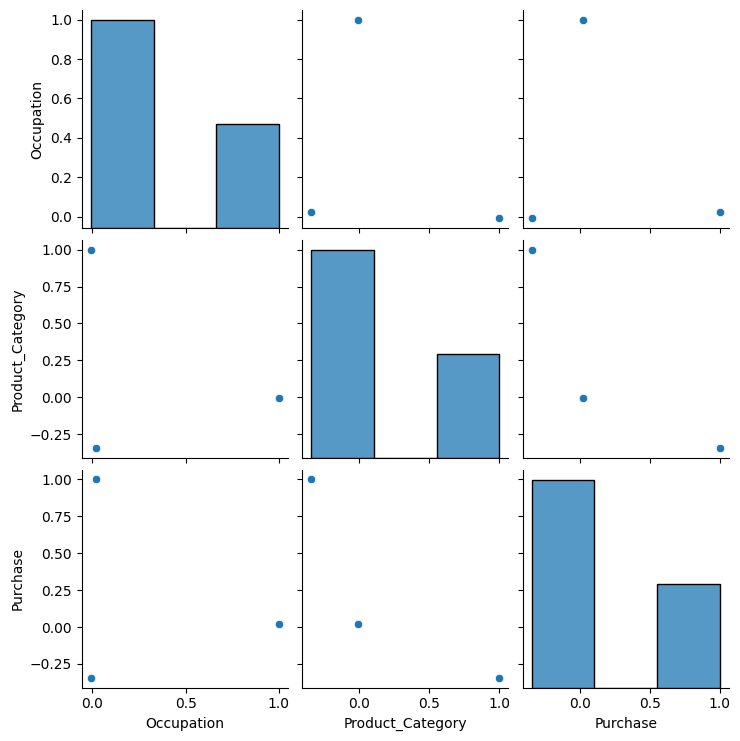

In [130]:
data = df[['Occupation','Product_Category','Purchase']]
x=data.corr()
plt.figure(figsize = (10, 7))
sns.heatmap(data=x, annot=True, cmap="Blues", square=True)

sns.pairplot(x)
print(x)
plt.show()


OBSERVATIONS

- Our dataset is hightly categorial variable centric. So we can hardly find correlation in our dataset.

## ANSWERING QUESTIONS

### QUESTIONS

1. Are women spending more money per transaction than men? Why or Why not? (10 Points)
2. Confidence intervals and distribution of the mean of the expenses by female and male customers (10 Points)
3. Are confidence intervals of average male and female spending overlapping? How can Walmart leverage this conclusion to make changes or improvements? (10 Points)

###gender and purchase

In [131]:
#finding relevent data between gender and purchace
data=df.groupby("Gender")
data = data["Purchase"].agg(["sum", "count"]).reset_index()
data["in_billions"] = data["sum"]/1000000000
data["%_sum"] =  data['sum']/data['sum'].sum()
data["sum/count"] = data["sum"]/data["count"]
data

,Gender,sum,count,in_billions,%_sum,sum/count
0,F,1186232642,135809,1.186233,0.232786,8734.565765
1,M,3909580100,414259,3.909580,0.767214,9437.526040


<ipython-input-132-b1685e6f3aa4>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x= data['Gender'],y= data['sum/count'],palette = color_map[0:2])


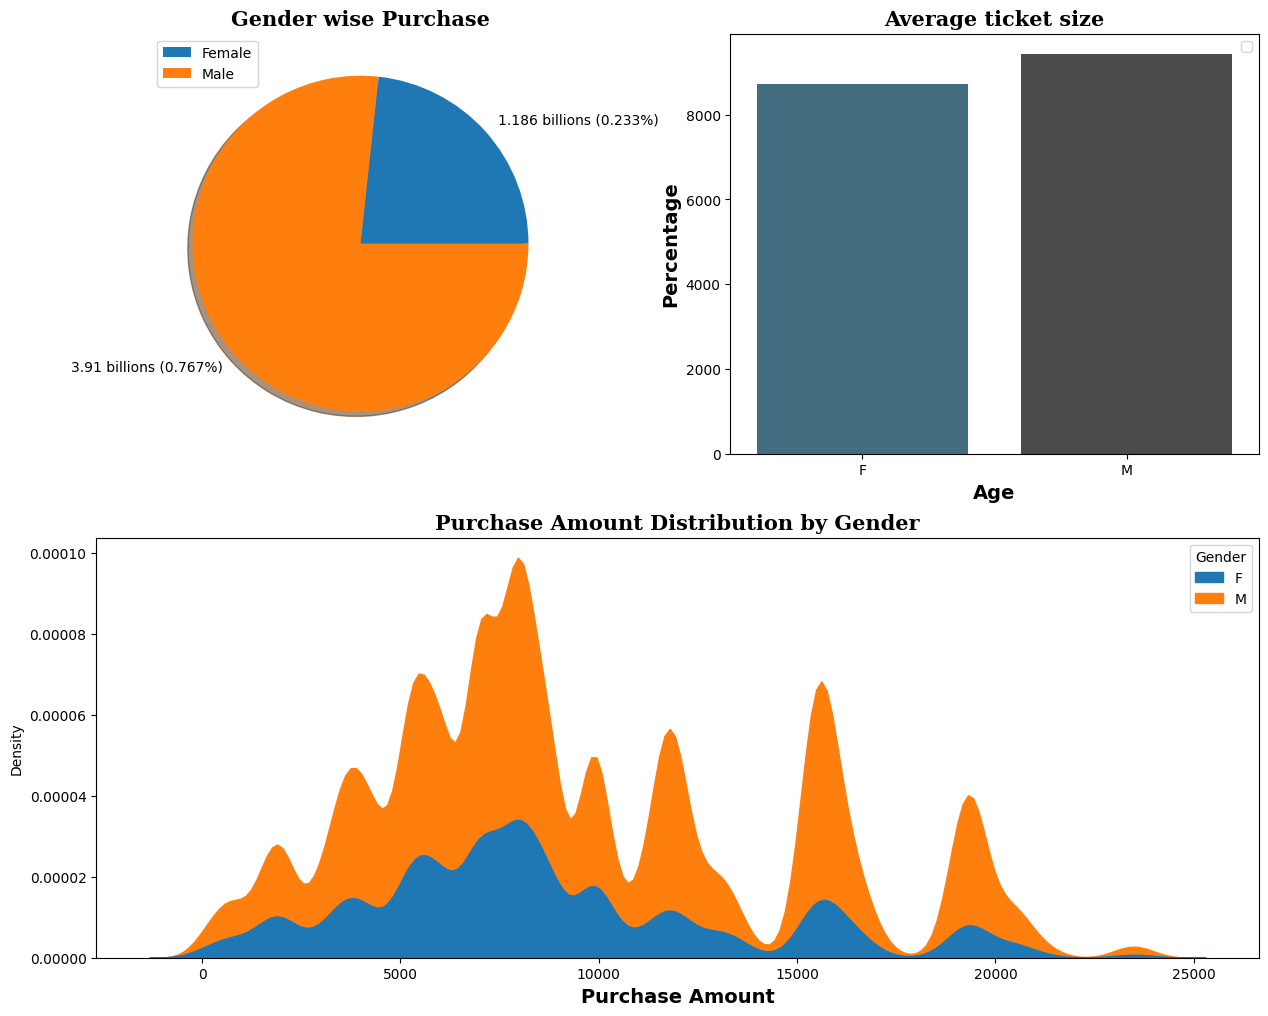

In [132]:
#plotting
fig = plt.figure(figsize = (15,12))
gs = fig.add_gridspec(2,2)
color_map = ["#3A7089", "#4b4b4c",'#99AEBB','#5C8374','#6F7597','#7A9D54','#9EB384']
#pie chart
ax = fig.add_subplot(gs[0,0])

# Create a list of labels with the percentage values
percentage_labels = [f'{label} billions ({value}%)' for label, value in zip(round(data['in_billions'],3), round(data['%_sum'],3))]

ax.pie(data['%_sum'], labels=percentage_labels, shadow=True, textprops={'fontsize': 10, 'color': 'black'})
ax.set_title('Gender wise Purchase', {'font': 'serif', 'size': 15, 'weight': 'bold'})

# Create the custom legend
plt.legend(["Female","Male"],loc=("upper left"))

#Bar chart
ax1 = fig.add_subplot(gs[0,1])

sns.barplot(x= data['Gender'],y= data['sum/count'],palette = color_map[0:2])
plt.xlabel('Age',fontsize = 14,fontweight = 'bold')
plt.ylabel('Percentage',fontsize = 14,fontweight = 'bold')
plt.title('Average ticket size', {'font': 'serif', 'size': 15, 'weight': 'bold'})
plt.legend()



#kde plot

ax2 = fig.add_subplot(gs[1,:])
sns.kdeplot(data = df, x = 'Purchase', hue = 'Gender',fill = True, alpha = 1,ax = ax2)
plt.xlabel('Purchase Amount',fontsize = 14,fontweight = 'bold')
plt.title('Purchase Amount Distribution by Gender', {'font': 'serif', 'size': 15, 'weight': 'bold'})


plt.show()

OBSERVATIONS

1. Total Sales and Transactions Comparison
    - The total purchase amount and number of transactions by male customers was more than three times the amount and transactions by female customers indicating that they had a more significant impact on the Black Friday sales.
2. Average Transaction Value
    - The average purchase amount per transaction was slightly higher for male customers than female customers (USD 9438 vs USD 8735).
3. Distribution of Purchase Amount
    - As seen above, the purchase amount for both the genders is not normally distributed.

In [133]:
# making formula
def plot(ci):
    ''' ci = confidence intrval we want
    a=one of the data you want to compare like this <<df.loc[df['Gender'] == 'M','Purchase']>>
    b=other data you want to compare
    '''

    #getting values of a and b for now only
    df_male = df.loc[df['Gender'] == 'M','Purchase'].values
    df_female = df.loc[df['Gender'] == 'F','Purchase'].values

    #setting plot size
    fig = plt.figure(figsize = (15,8))
    gs = fig.add_gridspec(2,2)

    #selecting sample size
    sample_size = [(10,0,0),(100,0,1),(1000,1,0),(10000,1,1)]

    #range
    bootstrap_range = 20000

    male_samples = {}
    female_samples = {}

    for i,x,y in sample_size:
        mean_male = []
        mean_female = []

        #random samples
        for j in range(bootstrap_range):
            bootstrapped_samples_male = np.random.choice(df_male, size= i)
            bootstrapped_samples_female = np.random.choice(df_female, size= i)

            #finding mean
            bootstrapped_mean_male = np.mean(bootstrapped_samples_male)
            bootstrapped_mean_female = np.mean(bootstrapped_samples_female)

            #appending tho list already created
            mean_male.append(bootstrapped_mean_male)
            mean_female.append(bootstrapped_mean_female)

        #storing the above sample generated
        male_samples[f'{ci}%_{i}'] = mean_male
        female_samples[f'{ci}%_{i}'] = mean_female

        #percentile x1 and x2
        #for male
        x1_male = np.percentile(mean_male, (50-ci/2))
        x2_male = np.percentile(mean_male, (50+ci/2))

        #for female
        x1_female = np.percentile(mean_female, (50-ci/2))
        x2_female = np.percentile(mean_female, (50+ci/2))

        #plotting
        ax = fig.add_subplot(gs[x,y])
        sns.kdeplot(mean_male, fill=True, color ="orange",label = 'male')
        sns.kdeplot(mean_female, fill=True, color ="blue",label = 'female')

        #title
        plt.title(f'CLT Curve for Sample Size = {i}',{'font':'serif', 'size':11,'weight':'bold'})

        #line for percentile

        #for female
        plt.axvline(x=x1_female, color='blue', linestyle='--', label = "female")
        plt.axvline(x=x2_female, color='blue', linestyle='--',label = "female")


        #for male
        plt.axvline(x=x1_male, color='orange', linestyle='--', label = "male")
        plt.axvline(x=x2_male, color='orange', linestyle='--',label = "male")

        #getting legend
        plt.legend(["Female","Male"])

    #setting title for visual
    fig.suptitle(f'{ci}% Confidence Interval',font = 'serif', size = 18, weight = 'bold')

    plt.show()

    return male_samples, female_samples


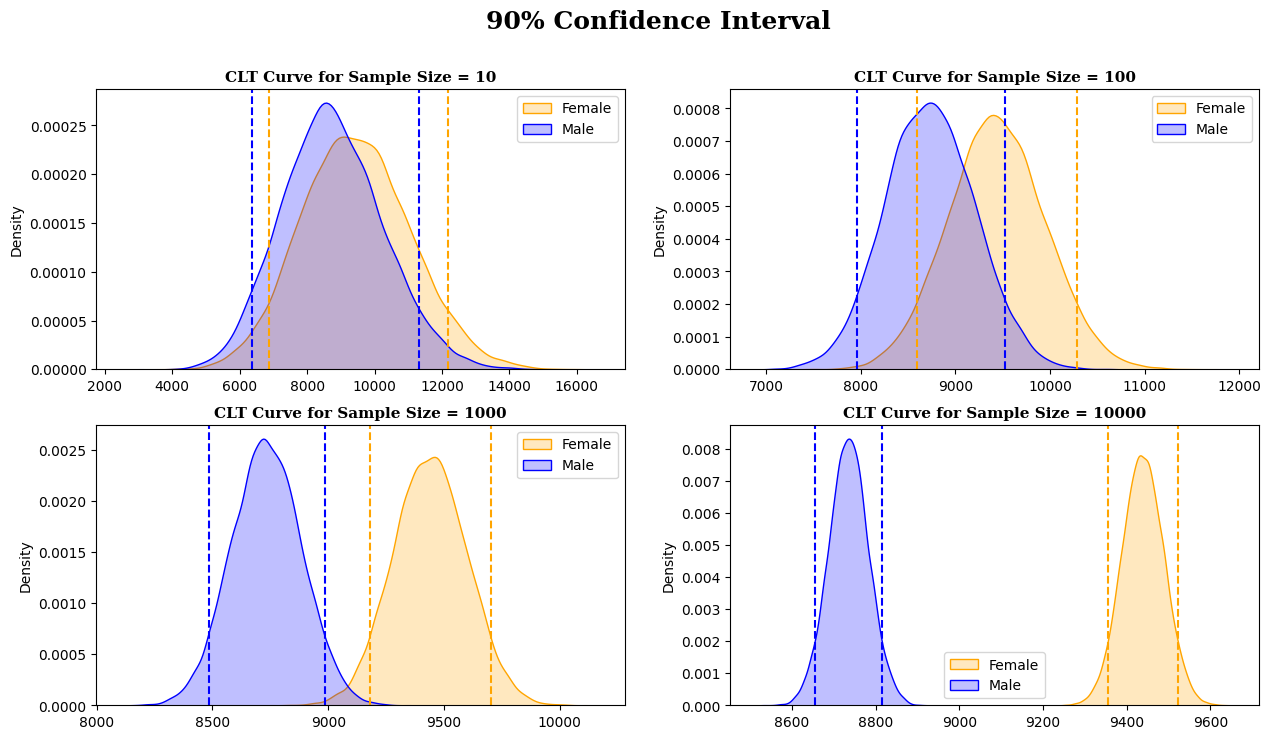

In [134]:
m_samp_90,f_samp_90 = plot(90)

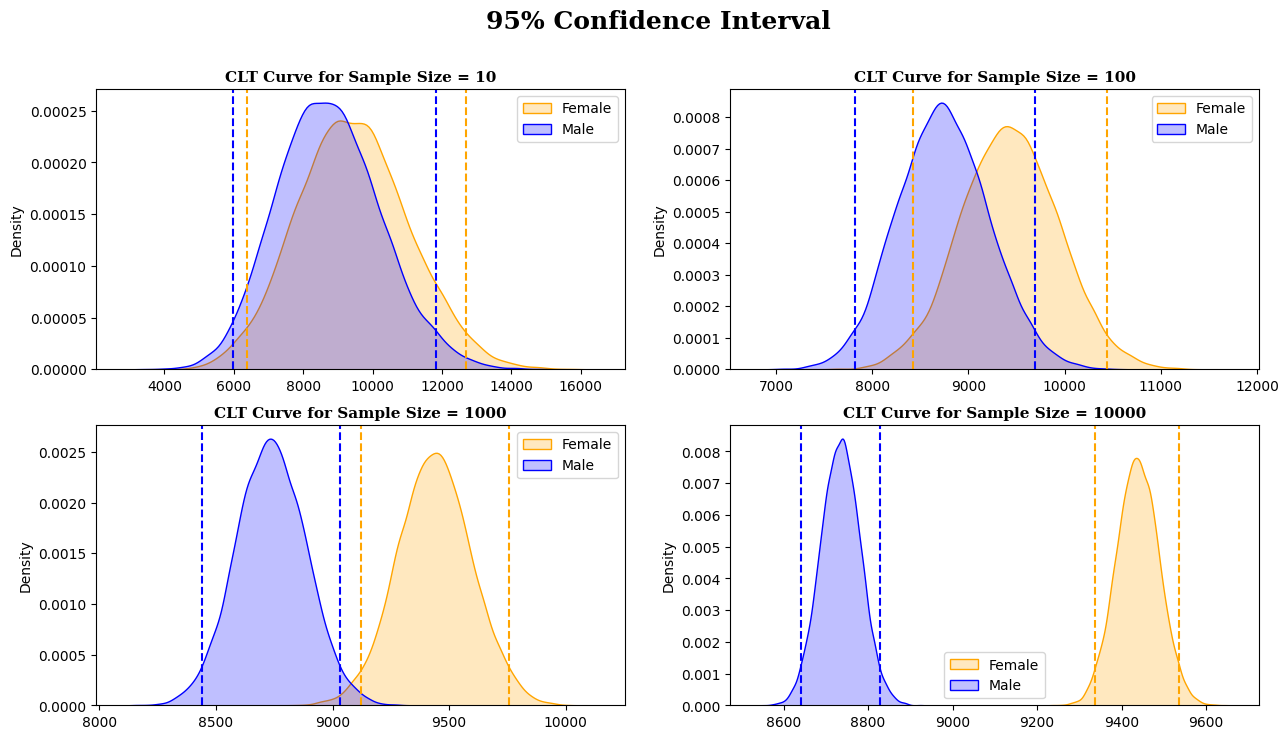

In [135]:
m_samp_95,f_samp_95 = plot(95)

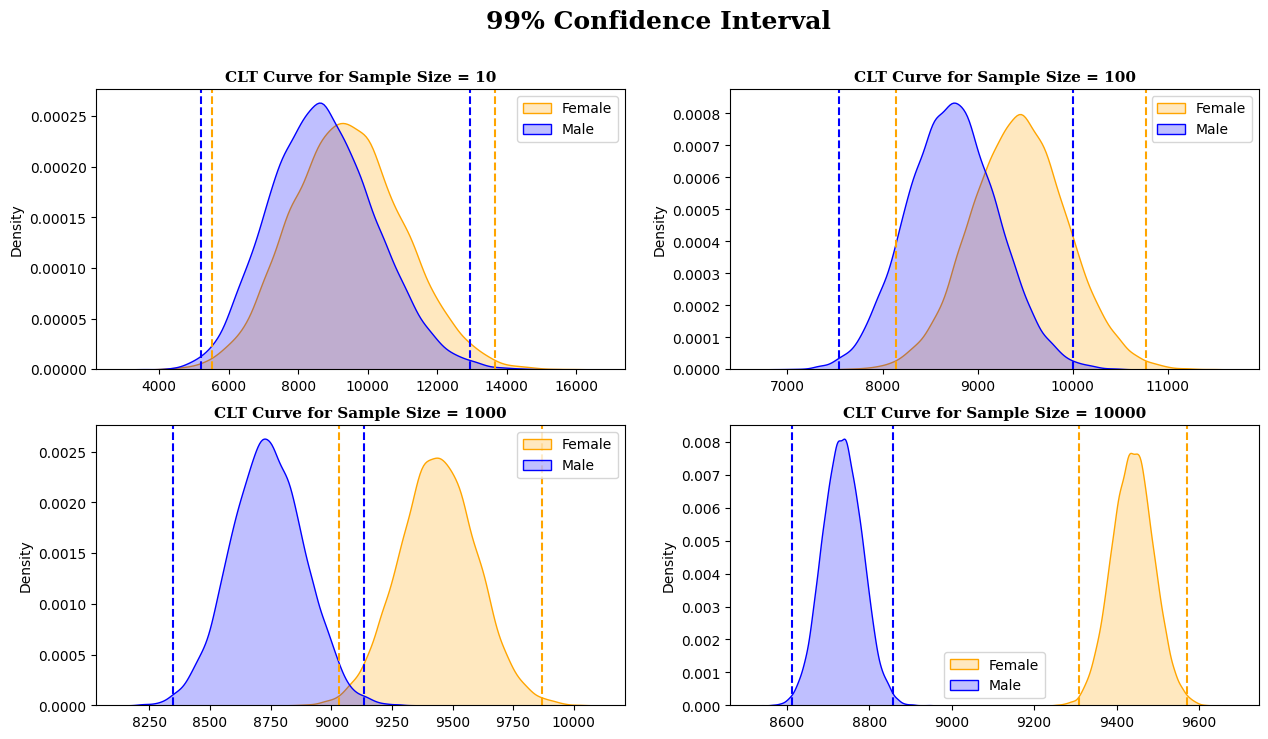

In [136]:
m_samp_99,f_samp_99 = plot(99)

In [137]:
#creating a function to calculate confidence interval

def confidence_interval(data,ci):
    #converting the list to series
    l_ci = (100-ci)/2
    u_ci = (100+ci)/2

    #calculating lower limit and upper limit of confidence interval
    interval = np.percentile(data,[l_ci,u_ci]).round(0)

    return interval

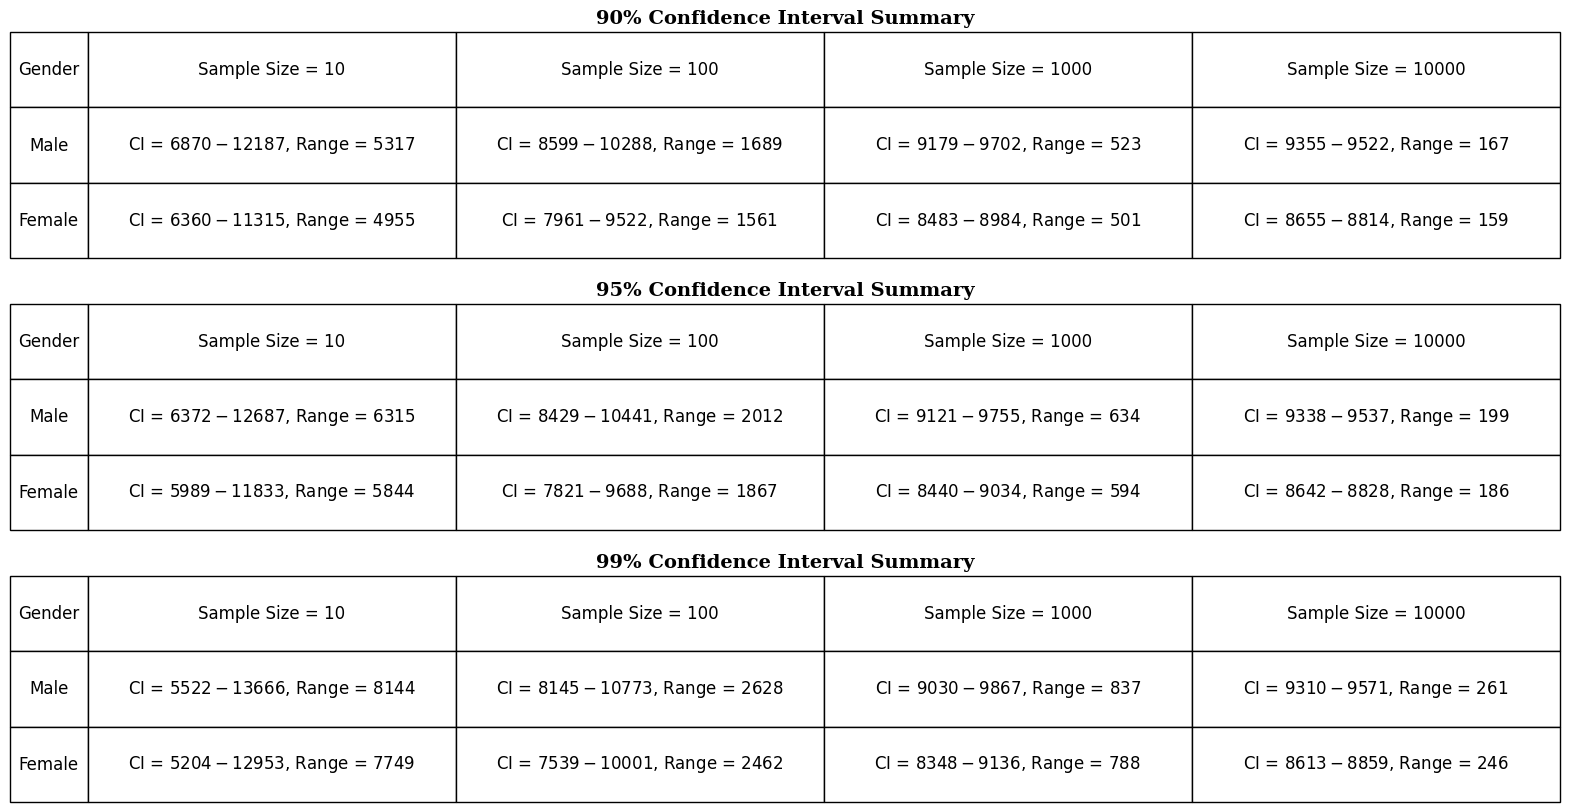

In [138]:
fig = plt.figure(figsize = (20,10))
gs = fig.add_gridspec(3,1)

for i,j,k,l in [(m_samp_90,f_samp_90,90,0),(m_samp_95,f_samp_95,95,1),(m_samp_99,f_samp_99,99,2)]:
    #list for collecting ci for given cl
    m_ci = ['Male']
    f_ci = ['Female']

    #finding ci for each sample size (males)
    for m in i:
        m_range = confidence_interval(i[m],k)
        m_ci.append(f"CI = ${m_range[0]:.0f} - ${m_range[1]:.0f}, Range = {(m_range[1] - m_range[0]):.0f}")

    #finding ci for each sample size (females)
    for f in j:
        f_range = confidence_interval(j[f],k)
        f_ci.append(f"CI = ${f_range[0]:.0f} - ${f_range[1]:.0f}, Range = {(f_range[1] - f_range[0]):.0f}")

                                        #plotting the summary
    ax = fig.add_subplot(gs[l])

    #contents of the table
    ci_info = [m_ci,f_ci]

    #plotting the table
    table = ax.table(cellText = ci_info, cellLoc='center',
                     colLabels =['Gender','Sample Size = 10','Sample Size = 100','Sample Size = 1000','Sample Size = 10000'],
                     colLoc = 'center',colWidths = [0.05,0.2375,0.2375,0.2375,0.2375],bbox =[0, 0, 1, 1])

    table.set_fontsize(13)

    #removing axis
    ax.axis('off')

    #setting title
    ax.set_title(f"{k}% Confidence Interval Summary",{'font':'serif', 'size':14,'weight':'bold'})

OBSERVATIONS

1. Sample Size

    The analysis highlights the importance of sample size in estimating population parameters. It suggests that as the sample size increases, the confidence intervals become narrower and more precise. In business, this implies that larger sample sizes can provide more reliable insights and estimates.
2. Confidence Intervals

    From the above analysis, we can see that except for the Sample Size of 100, the confidence interval do not overlap as the sample size increases. This means that there is a statistically significant difference between the average spending per transaction for men and women within the given samples.
3. Population Average

    We are 95% confident that the true population average for males falls between USD 9,393 and USD 9,483, and for females, it falls between USD 8692 and USD8,777.
4. Women spend less

    Men tend to spend more money per transaction on average than women, as the upper bounds of the confidence intervals for men are consistently higher than those for women across different sample sizes.
5. How can Walmart leverage this conclusion to make changes or improvements?
    
  * Segmentation Opportunities

    Walmart can create targeted marketing campaigns, loyalty programs, or product bundles to cater to the distinct spending behaviors of male and female customers. This approach may help maximize revenue from each customer segment.

  * Pricing Strategies

    Based on the above data of average spending per transaction by gender, they might adjust pricing or discount strategies to incentivize higher spending among male customers while ensuring competitive pricing for female-oriented products.
- Note
    
    Moving forward in our analysis, we will use 95% Confidence Level only.

###married-unmarried and Purchase

In [139]:
data=df.groupby("Marital_Status")
data = data["Purchase"].agg(["sum", "count"]).reset_index()
data["in_billions"] = data["sum"]/1000000000
data["%_sum"] =  data['sum']/data['sum'].sum()
data["sum/count"] = data["sum"]/data["count"]
data

,Marital_Status,sum,count,in_billions,%_sum,sum/count
0,Unmarried,3008927447,324731,3.008927,0.590471,9265.907619
1,Married,2086885295,225337,2.086885,0.409529,9261.174574


<ipython-input-140-f163f8838b7c>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x= data['Marital_Status'],y= data['sum/count'],palette = color_map[0:2])


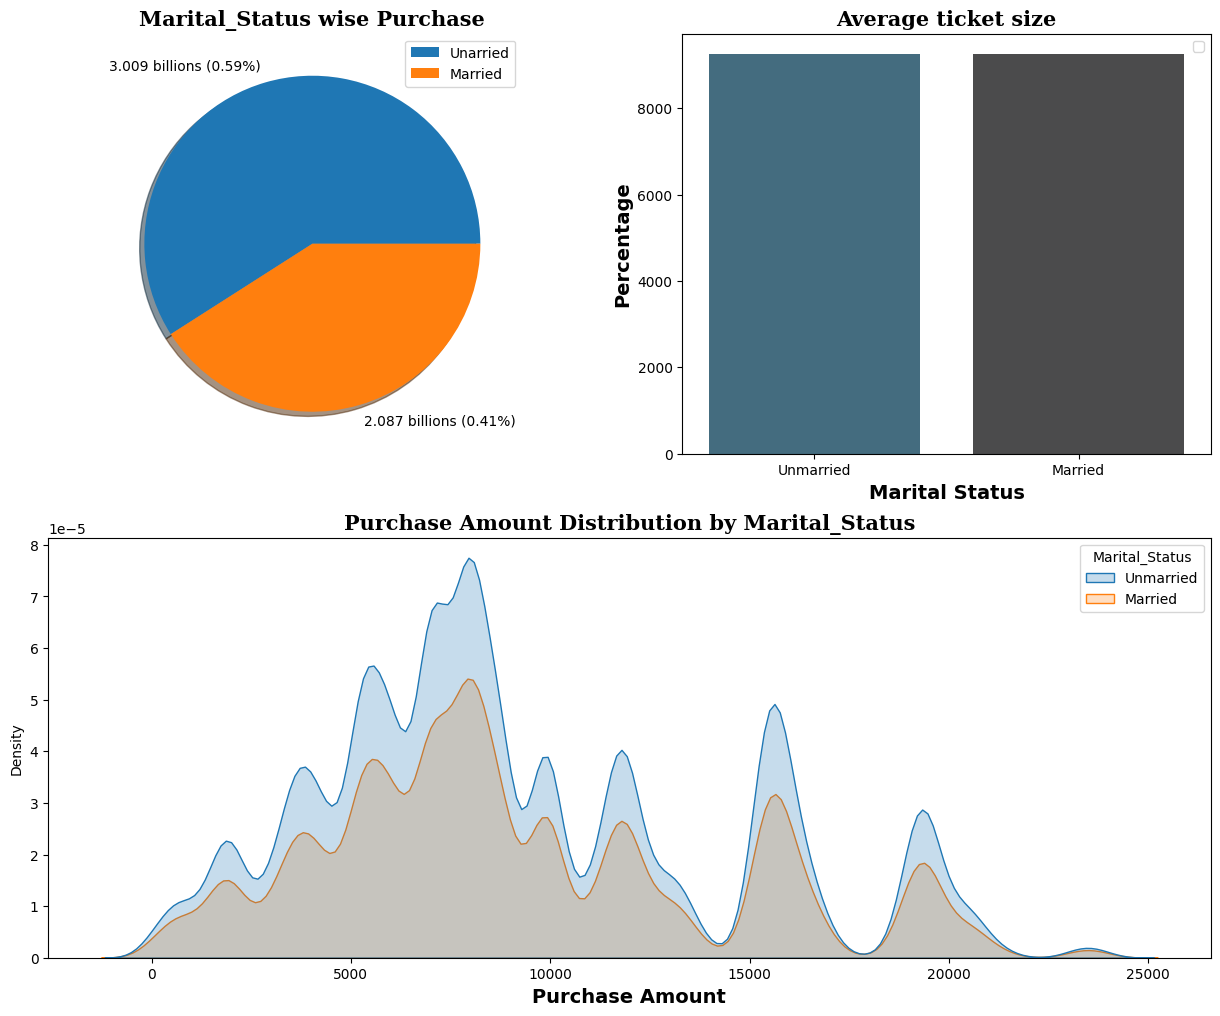

In [140]:
#plotting
fig = plt.figure(figsize = (15,12))
gs = fig.add_gridspec(2,2)
color_map = ["#3A7089", "#4b4b4c",'#99AEBB','#5C8374','#6F7597','#7A9D54','#9EB384']
#pie chart
ax = fig.add_subplot(gs[0,0])

# Create a list of labels with the percentage values
percentage_labels = [f'{label} billions ({value}%)' for label, value in zip(round(data['in_billions'],3), round(data['%_sum'],3))]

ax.pie(data['%_sum'], labels=percentage_labels, shadow=True, textprops={'fontsize': 10, 'color': 'black'})
ax.set_title('Marital_Status wise Purchase', {'font': 'serif', 'size': 15, 'weight': 'bold'})

# Create the custom legend
plt.legend(["Unarried","Married"],loc=("upper right"))

#Bar chart
ax1 = fig.add_subplot(gs[0,1])

sns.barplot(x= data['Marital_Status'],y= data['sum/count'],palette = color_map[0:2])
plt.xlabel('Marital Status',fontsize = 14,fontweight = 'bold')
plt.ylabel('Percentage',fontsize = 14,fontweight = 'bold')
plt.title('Average ticket size', {'font': 'serif', 'size': 15, 'weight': 'bold'})
plt.legend()



#kde plot

ax2 = fig.add_subplot(gs[1,:])
sns.kdeplot(data = df, x = 'Purchase', hue = 'Marital_Status',fill = True)
plt.xlabel('Purchase Amount',fontsize = 14,fontweight = 'bold')
plt.title('Purchase Amount Distribution by Marital_Status', {'font': 'serif', 'size': 15, 'weight': 'bold'})


plt.show()

OBSERVATIONS

1. Total Sales and Transactions Comparison

  - The total purchase amount and number of transactions by Unmarried customers was more than 20% the amount and transactions by married customers indicating that they had a more significant impact on the Black Friday sales.
2. Average Transaction Value

  - The average purchase amount per transaction was almost similar for married and unmarried customers (USD 9261 vs 9266 USD).
3. Distribution of Purchase Amount

  - As seen above, the purchase amount for both married and unmarried customers is not normally distributed.

In [141]:
# making formula
def plot(ci,label_a,label_b):
    ''' ci = confidence intrval we want
    a=one of the data you want to compare like this <<df.loc[df['Gender'] == 'M','Purchase']>>
    b=other data you want to compare
    label_a = self explained >> input string
    label_b = self explained >> input string

    sample ize is decided-- at 10, 100, 1000, 10000
    '''

    #getting values of a and b for now only
    df_a = df.loc[df["Marital_Status"]=="Married","Purchase"]
    df_b = df.loc[df["Marital_Status"]=="Unmarried","Purchase"]

    #setting plot size
    fig = plt.figure(figsize = (15,8))
    gs = fig.add_gridspec(2,2)

    #selecting sample size
    sample_size = [(10,0,0),(100,0,1),(1000,1,0),(10000,1,1)]

    #range
    bootstrap_range = 20000

    a_samples = {}
    b_samples = {}

    for i,x,y in sample_size:
        mean_a = []
        mean_b = []

        #random samples
        for j in range(bootstrap_range):
            bootstrapped_samples_a = np.random.choice(df_a, size= i)
            bootstrapped_samples_b = np.random.choice(df_b, size= i)

            #finding mean
            bootstrapped_mean_a = np.mean(bootstrapped_samples_a)
            bootstrapped_mean_b = np.mean(bootstrapped_samples_b)

            #appending tho list already created
            mean_a.append(bootstrapped_mean_a)
            mean_b.append(bootstrapped_mean_b)

        #storing the above sample generated
        a_samples[f'{ci}%_{i}'] = mean_a
        b_samples[f'{ci}%_{i}'] = mean_b

        #percentile x1 and x2
        #for male
        x1_a = np.percentile(mean_a, (50-ci/2))
        x2_a = np.percentile(mean_a, (50+ci/2))

        #for female
        x1_b = np.percentile(mean_b, (50-ci/2))
        x2_b = np.percentile(mean_b, (50+ci/2))

        #plotting
        ax = fig.add_subplot(gs[x,y])
        sns.kdeplot(mean_a, fill=True, color ="orange",label = label_a)
        sns.kdeplot(mean_b, fill=True, color ="blue",label = label_b)

        #title
        plt.title(f'CLT Curve for Sample Size = {i}',{'font':'serif', 'size':11,'weight':'bold'})

        #line for percentile

        #for female
        plt.axvline(x=x1_b, color='blue', linestyle='--', label = label_b)
        plt.axvline(x=x2_b, color='blue', linestyle='--',label = label_b)


        #for male
        plt.axvline(x=x1_a, color='orange', linestyle='--', label = label_a)
        plt.axvline(x=x1_a, color='orange', linestyle='--',label = label_a)

        #getting legend
        plt.legend([label_b,label_a])

    #setting title for visual
    fig.suptitle(f'{ci}% Confidence Interval',font = 'serif', size = 18, weight = 'bold')

    plt.show()

    return a_samples, b_samples


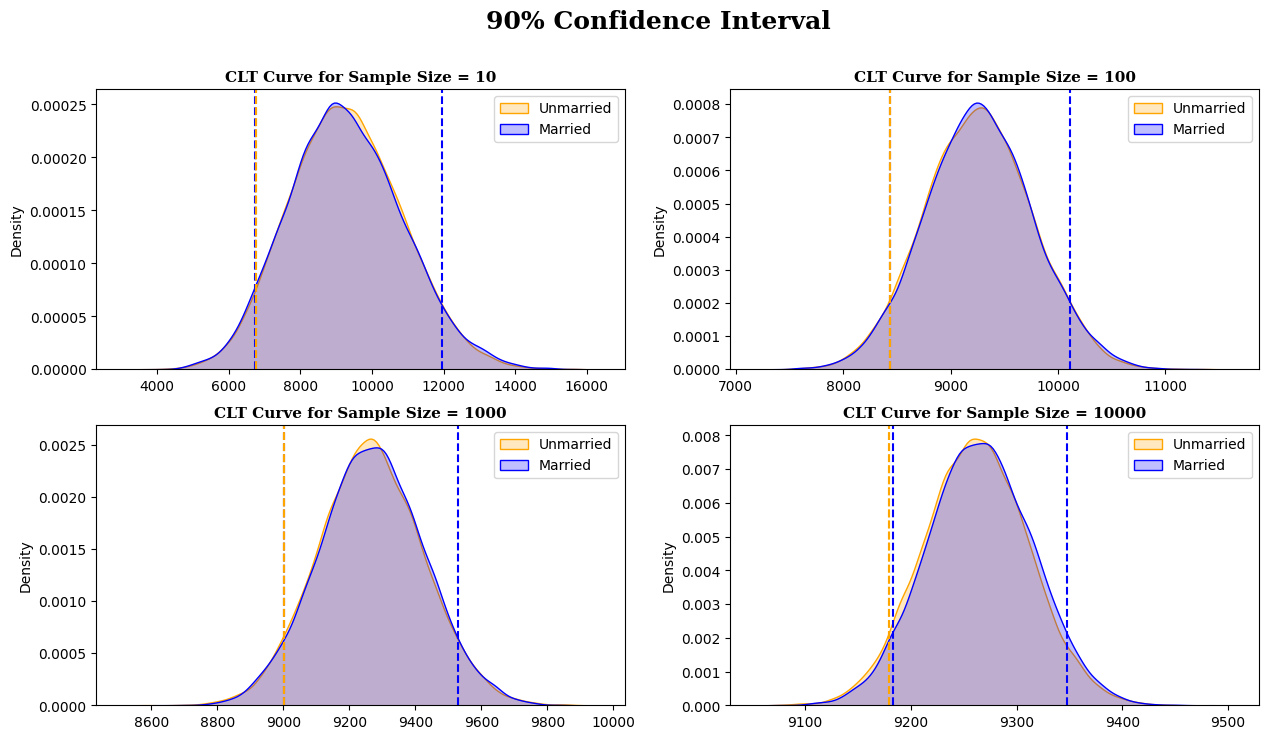

In [142]:
m_samp_90,u_samp_90 = plot(ci=90,label_a="Married",label_b="Unmarried")

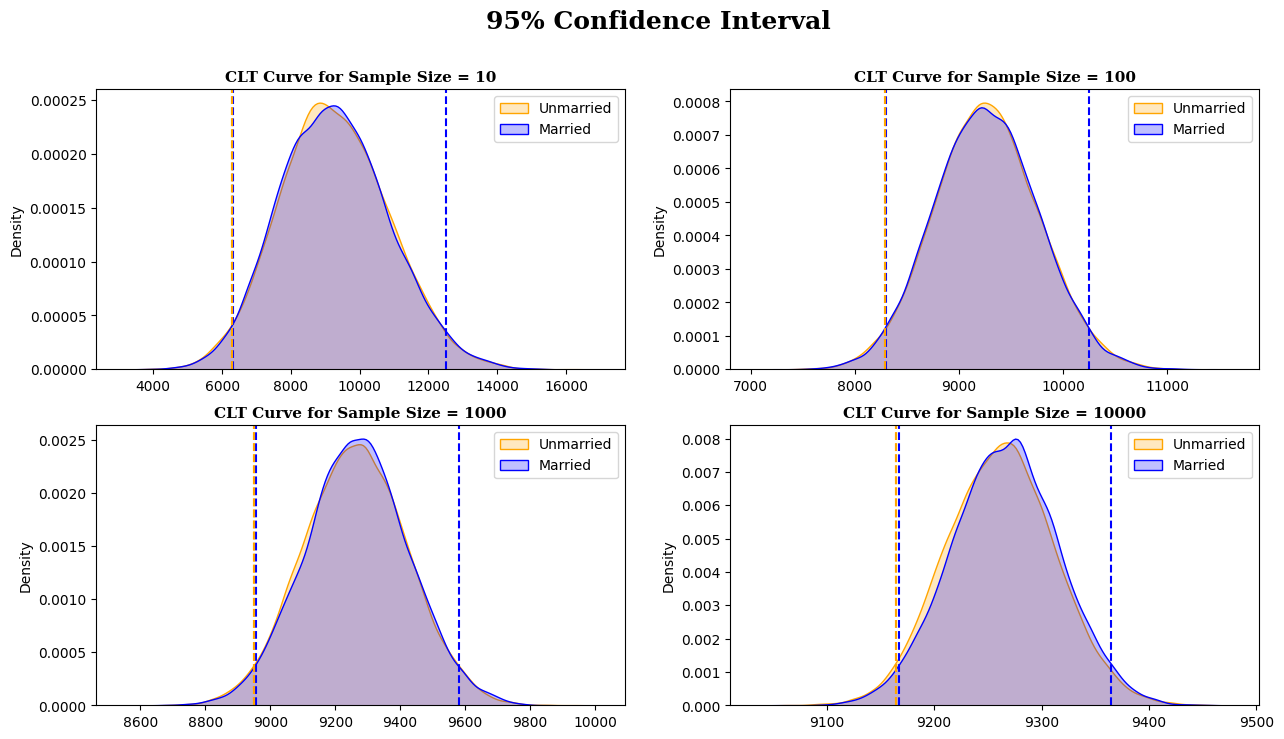

In [143]:
m_samp_95,u_samp_95 = plot(ci=95,label_a="Married",label_b="Unmarried")

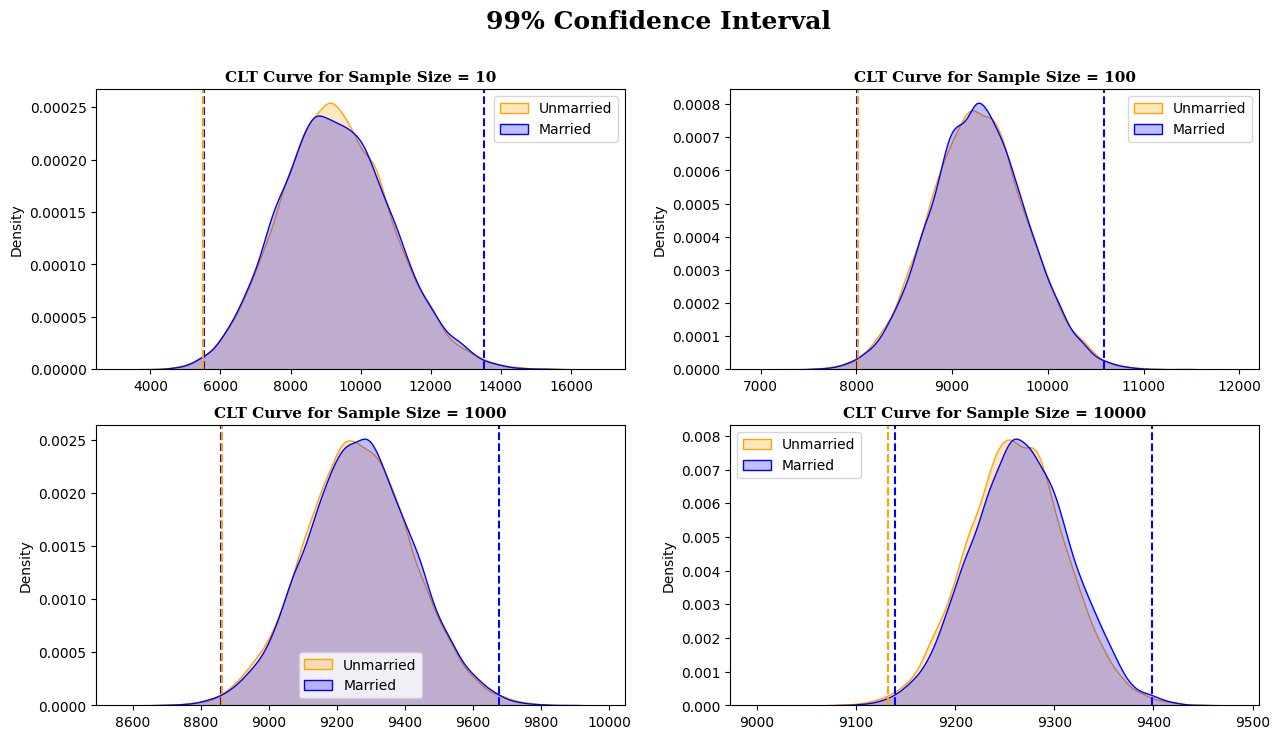

In [144]:
m_samp_99,u_samp_99 = plot(ci=99,label_a="Married",label_b="Unmarried")

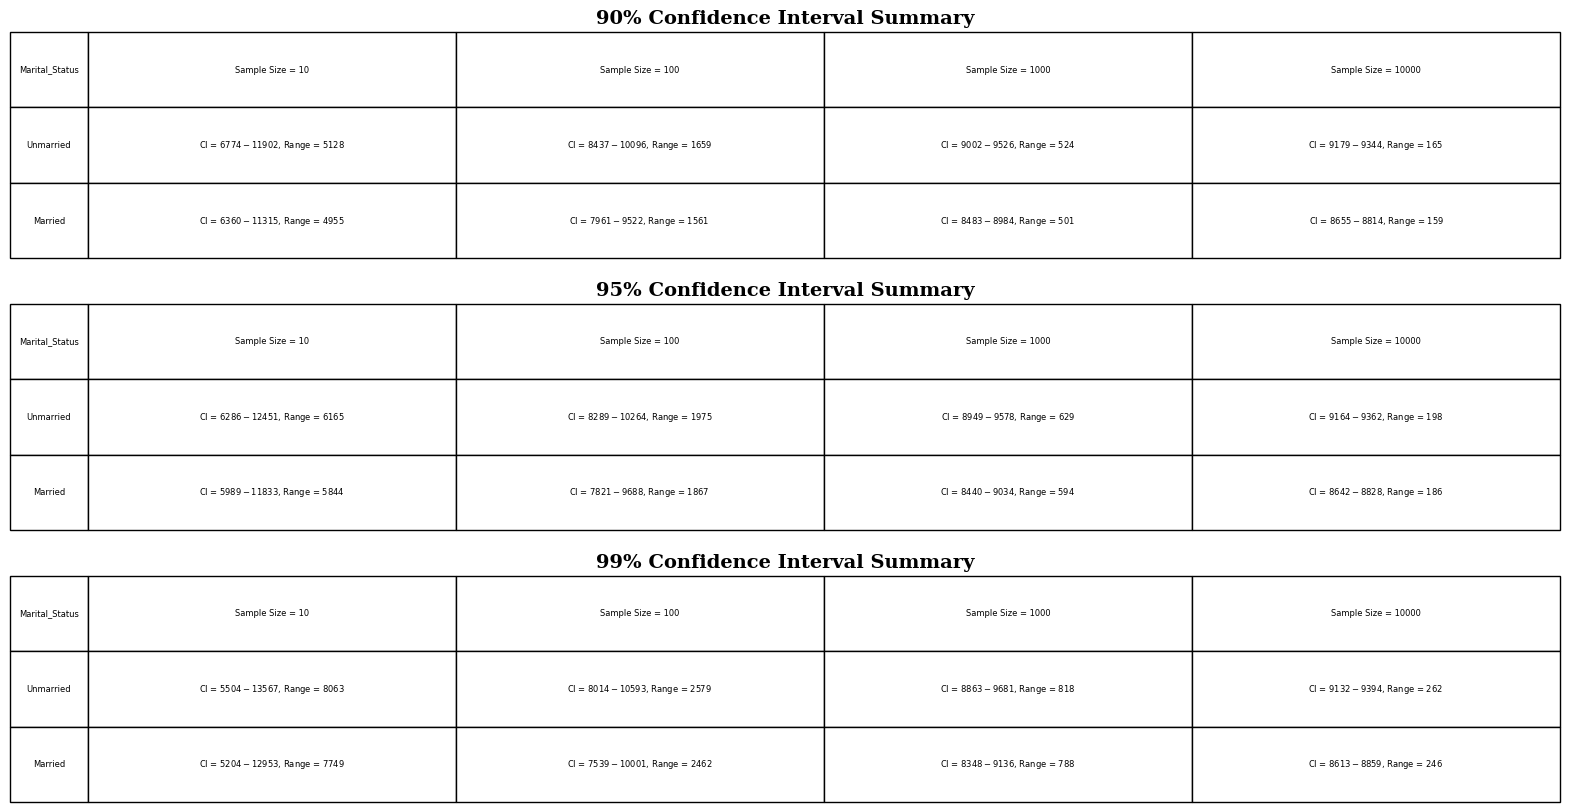

In [145]:
fig = plt.figure(figsize = (20,10))
gs = fig.add_gridspec(3,1)

for i,j,k,l in [(m_samp_90,f_samp_90,90,0),(m_samp_95,f_samp_95,95,1),(m_samp_99,f_samp_99,99,2)]:
    #list for collecting ci for given cl
    m_ci = ['Unmarried']
    f_ci = ['Married']

    #finding ci for each sample size (males)
    for m in i:
        m_range = confidence_interval(i[m],k)
        m_ci.append(f"CI = ${m_range[0]:.0f} - ${m_range[1]:.0f}, Range = {(m_range[1] - m_range[0]):.0f}")

    #finding ci for each sample size (females)
    for f in j:
        f_range = confidence_interval(j[f],k)
        f_ci.append(f"CI = ${f_range[0]:.0f} - ${f_range[1]:.0f}, Range = {(f_range[1] - f_range[0]):.0f}")

                                        #plotting the summary
    ax = fig.add_subplot(gs[l])

    #contents of the table
    ci_info = [m_ci,f_ci]

    #plotting the table
    table = ax.table(cellText = ci_info, cellLoc='center',
                     colLabels =['Marital_Status','Sample Size = 10','Sample Size = 100','Sample Size = 1000','Sample Size = 10000'],
                     colLoc = 'center',colWidths = [0.05,0.2375,0.2375,0.2375,0.2375],bbox =[0, 0, 1, 1])

    table.set_fontsize(13)

    #removing axis
    ax.axis('off')

    #setting title
    ax.set_title(f"{k}% Confidence Interval Summary",{'font':'serif', 'size':14,'weight':'bold'})

OBSERVATIONS

1. Sample Size

  - The analysis highlights the importance of sample size in estimating population parameters. It suggests that as the sample size increases, the confidence intervals become narrower and more precise. In business, this implies that larger sample sizes can provide more reliable insights and estimates.
2. Confidence Intervals

  - From the above analysis, we can see that the confidence interval overlap for all the sample sizes. This means that there is no statistically significant difference between the average spending per transaction for married and unmarried customers within the given samples.
3. Population Average

  - We are 95% confident that the true population average for married customers falls between 9,217 and 9,305, and for unmarried customers, it falls between 9,222 and 9,311.
4. Both the customers spend equal

  - The overlapping confidence intervals of average spending for married and unmarried customers indicate that both married and unmarried customers spend a similar amount per transaction. This implies a resemblance in spending behavior between the two groups.
5. How can Walmart leverage this conclusion to make changes or improvements?  

 - Marketing Resources

    Walmart may not need to allocate marketing resources specifically targeting one group over the other. Instead, they can focus on broader marketing strategies that appeal to both groups

###AGE-GROUPS AND PURCHASE

In [146]:
data=df.groupby("Age")
data = data["Purchase"].agg(["sum", "count"]).reset_index()
data["in_billions"] = data["sum"]/1000000000
data["%_sum"] =  data['sum']/data['sum'].sum()
data["sum/count"] = data["sum"]/data["count"]
data

,Age,sum,count,in_billions,%_sum,sum/count
0,0-17,134913183,15102,0.134913,0.026475,8933.464640
1,18-25,913848675,99660,0.913849,0.179333,9169.663606
2,26-35,2031770578,219587,2.031771,0.398714,9252.690633
3,36-45,1026569884,110013,1.026570,0.201454,9331.350695
4,46-50,420843403,45701,0.420843,0.082586,9208.625697
5,51-55,367099644,38501,0.367100,0.072039,9534.808031
6,55+,200767375,21504,0.200767,0.039398,9336.280459


<ipython-input-147-a13175bc2b0a>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x= data['Age'],y= data['sum/count'],palette = color_map)


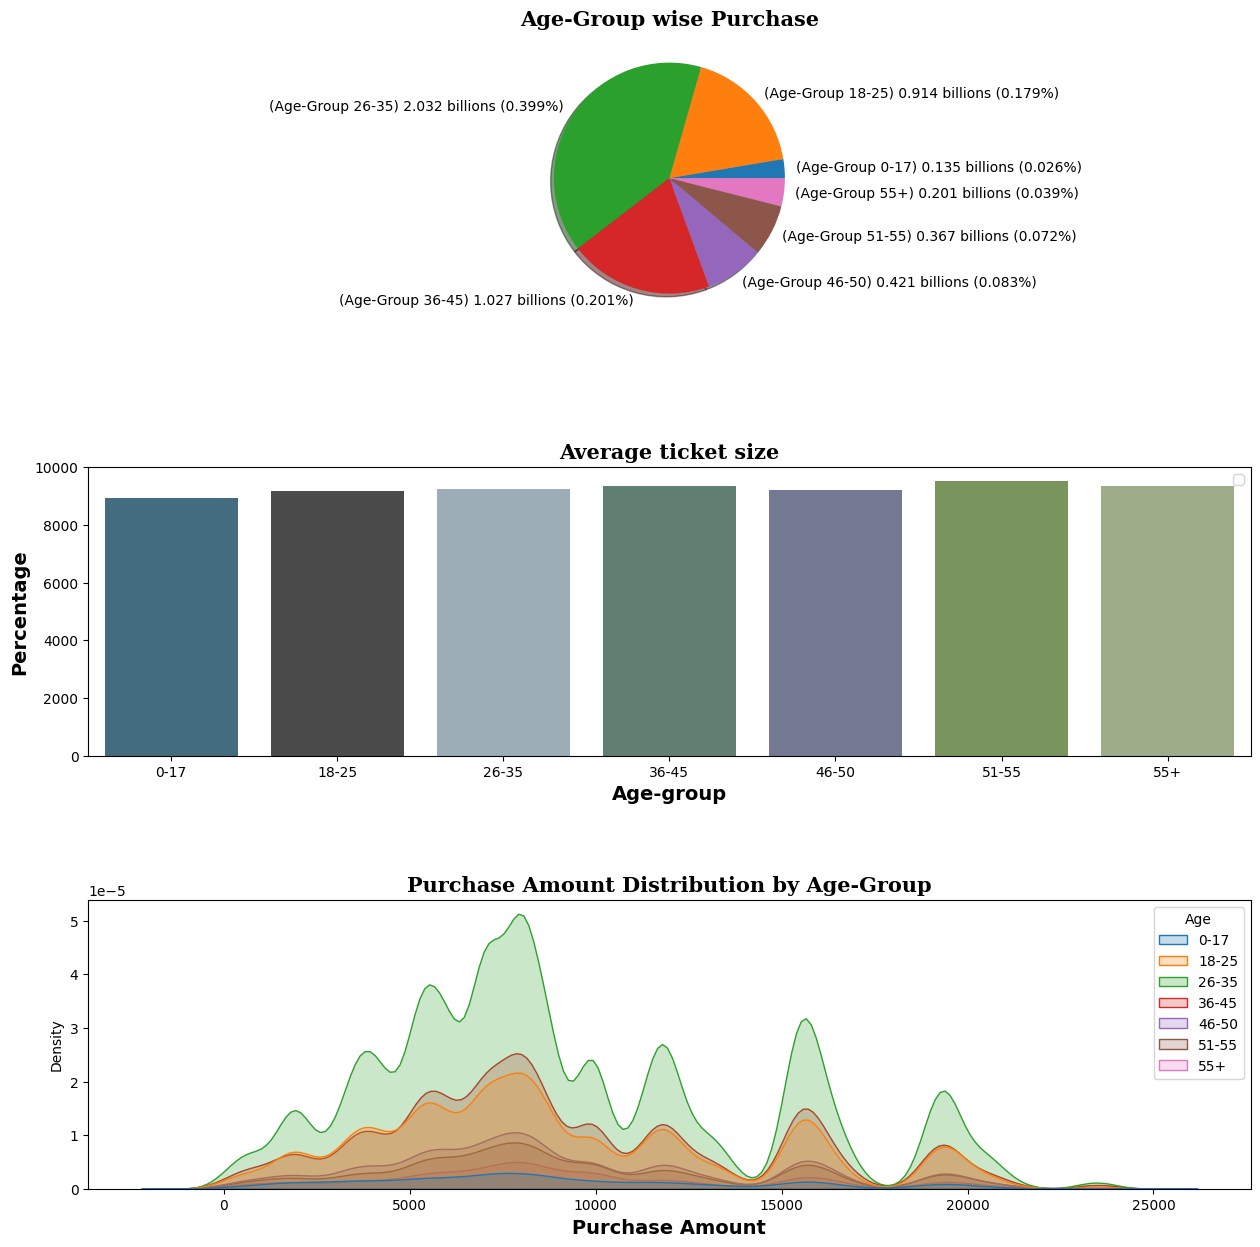

In [147]:
#plotting
fig = plt.figure(figsize = (15, 15))
gs = fig.add_gridspec(3,3)
color_map = ["#3A7089", "#4b4b4c",'#99AEBB','#5C8374','#6F7597','#7A9D54','#9EB384']
#pie chart
ax = fig.add_subplot(gs[0,:])
plt.subplots_adjust(hspace=0.5)

# Create a list of labels with the percentage values
percentage_labels = [f'(Age-Group {group}) {label} billions ({value}%)' for group, label, value in zip (data["Age"],round(data['in_billions'],3), round(data['%_sum'],3))]

ax.pie(data['%_sum'], labels=percentage_labels, shadow=True, textprops={'fontsize': 10, 'color': 'black'})
ax.set_title('Age-Group wise Purchase', {'font': 'serif', 'size': 15, 'weight': 'bold'})


#Bar chart
ax1 = fig.add_subplot(gs[1,:])

sns.barplot(x= data['Age'],y= data['sum/count'],palette = color_map)
plt.xlabel('Age-group',fontsize = 14,fontweight = 'bold')
plt.ylabel('Percentage',fontsize = 14,fontweight = 'bold')
plt.title('Average ticket size', {'font': 'serif', 'size': 15, 'weight': 'bold'})
plt.legend()



#kde plot

ax2 = fig.add_subplot(gs[2,:])
sns.kdeplot(data = df, x = 'Purchase', hue = 'Age',fill = True)
plt.xlabel('Purchase Amount',fontsize = 14,fontweight = 'bold')
plt.title('Purchase Amount Distribution by Age-Group', {'font': 'serif', 'size': 15, 'weight': 'bold'})


plt.show()

In [148]:
data

,Age,sum,count,in_billions,%_sum,sum/count
0,0-17,134913183,15102,0.134913,0.026475,8933.464640
1,18-25,913848675,99660,0.913849,0.179333,9169.663606
2,26-35,2031770578,219587,2.031771,0.398714,9252.690633
3,36-45,1026569884,110013,1.026570,0.201454,9331.350695
4,46-50,420843403,45701,0.420843,0.082586,9208.625697
5,51-55,367099644,38501,0.367100,0.072039,9534.808031
6,55+,200767375,21504,0.200767,0.039398,9336.280459


In [149]:
# making formula
def plot(ci):
    ''' ci = confidence intrval we want
    a=one of the data you want to compare like this <<df.loc[df['Gender'] == 'M','Purchase']>>
    b=other data you want to compare
    label_a = self explained >> input string
    label_b = self explained >> input string

    sample ize is decided-- at 10, 100, 1000, 10000
    '''
    #defining labels

    label_a = "0-17"
    label_b = "18-25"
    label_c = "26-35"
    label_d = "36-45"
    label_e = "46-50"
    label_f = "51-55"
    label_g = "55+"

    #getting values of a and b for now only
    df_a = df.loc[df["Age"]=="0-17","Purchase"]
    df_b = df.loc[df["Age"]=="18-25","Purchase"]
    df_c = df.loc[df["Age"]== "26-35","Purchase"]
    df_d = df.loc[df["Age"]== "36-45","Purchase"]
    df_e = df.loc[df["Age"]== "46-50","Purchase"]
    df_f = df.loc[df["Age"]== "51-55","Purchase"]
    df_g = df.loc[df["Age"]== "55+","Purchase"]

    #setting plot size
    fig = plt.figure(figsize = (15,15))
    gs = fig.add_gridspec(5,1)
    plt.subplots_adjust(hspace=0.5)

    #selecting sample size
    sample_size = [(10,0),(100,1),(1000,2),(10000,3),(50000,4)]

    #range
    bootstrap_range = 20000

    a_samples = {}
    b_samples = {}
    c_samples = {}
    d_samples = {}
    e_samples = {}
    f_samples = {}
    g_samples = {}

    for i,x in sample_size:
        mean_a = []
        mean_b = []
        mean_c = []
        mean_d = []
        mean_e = []
        mean_f = []
        mean_g = []

        #random samples
        for j in range(bootstrap_range):
            bootstrapped_samples_a = np.random.choice(df_a, size= i)
            bootstrapped_samples_b = np.random.choice(df_b, size= i)
            bootstrapped_samples_c = np.random.choice(df_c, size= i)
            bootstrapped_samples_d = np.random.choice(df_d, size= i)
            bootstrapped_samples_e = np.random.choice(df_e, size= i)
            bootstrapped_samples_f = np.random.choice(df_f, size= i)
            bootstrapped_samples_g = np.random.choice(df_g, size= i)


            #finding mean
            bootstrapped_mean_a = np.mean(bootstrapped_samples_a)
            bootstrapped_mean_b = np.mean(bootstrapped_samples_b)
            bootstrapped_mean_c = np.mean(bootstrapped_samples_c)
            bootstrapped_mean_d = np.mean(bootstrapped_samples_d)
            bootstrapped_mean_e = np.mean(bootstrapped_samples_e)
            bootstrapped_mean_f = np.mean(bootstrapped_samples_f)
            bootstrapped_mean_g = np.mean(bootstrapped_samples_g)

            #appending tho list already created
            mean_a.append(bootstrapped_mean_a)
            mean_b.append(bootstrapped_mean_b)
            mean_c.append(bootstrapped_mean_c)
            mean_d.append(bootstrapped_mean_d)
            mean_e.append(bootstrapped_mean_e)
            mean_f.append(bootstrapped_mean_f)
            mean_g.append(bootstrapped_mean_g)

        #storing the above sample generated
        a_samples[f'{ci}%_{i}'] = mean_a
        b_samples[f'{ci}%_{i}'] = mean_b
        c_samples[f'{ci}%_{i}'] = mean_c
        d_samples[f'{ci}%_{i}'] = mean_d
        e_samples[f'{ci}%_{i}'] = mean_e
        f_samples[f'{ci}%_{i}'] = mean_f
        g_samples[f'{ci}%_{i}'] = mean_g


        #percentile x1 and x2
        #for x1
        x1_a = np.percentile(mean_a, (50-ci/2))
        x1_b = np.percentile(mean_b, (50-ci/2))
        x1_c = np.percentile(mean_c, (50-ci/2))
        x1_d = np.percentile(mean_d, (50-ci/2))
        x1_e = np.percentile(mean_e, (50-ci/2))
        x1_f = np.percentile(mean_f, (50-ci/2))
        x1_g = np.percentile(mean_g, (50-ci/2))

        #for x2
        x2_a = np.percentile(mean_a, (50+ci/2))
        x2_b = np.percentile(mean_b, (50+ci/2))
        x2_c = np.percentile(mean_c, (50+ci/2))
        x2_d = np.percentile(mean_d, (50+ci/2))
        x2_e = np.percentile(mean_e, (50+ci/2))
        x2_f = np.percentile(mean_f, (50+ci/2))
        x2_g = np.percentile(mean_g, (50+ci/2))

        #plotting
        ax = fig.add_subplot(gs[x])
        sns.kdeplot(mean_a, fill=True, color ="orange",label = label_a)
        sns.kdeplot(mean_b, fill=True, color ="blue",label = label_b)
        sns.kdeplot(mean_c, fill=True, color ="green",label = label_c)
        sns.kdeplot(mean_d, fill=True, color ="yellow",label = label_d)
        sns.kdeplot(mean_e, fill=True, color ="red",label = label_e)
        sns.kdeplot(mean_f, fill=True, color ="pink",label = label_f)
        sns.kdeplot(mean_g, fill=True, color ="gray",label = label_g)


        #title
        plt.title(f'CLT Curve for Sample Size = {i}',{'font':'serif', 'size':11,'weight':'bold'})

        #line for percentile

        #for x1
        plt.axvline(x=x1_a, color='orange', linestyle='--', label = label_a)
        plt.axvline(x=x1_b, color='blue', linestyle='--', label = label_b)
        plt.axvline(x=x1_c, color='green', linestyle='--', label = label_c)
        plt.axvline(x=x1_d, color='yellow', linestyle='--', label = label_d)
        plt.axvline(x=x1_e, color='red', linestyle='--', label = label_e)
        plt.axvline(x=x1_f, color='pink', linestyle='--', label = label_f)
        plt.axvline(x=x1_g, color='gray', linestyle='--', label = label_g)

        #for x2
        plt.axvline(x=x2_a, color='orange', linestyle='--',label = label_a)
        plt.axvline(x=x2_b, color='blue', linestyle='--',label = label_b)
        plt.axvline(x=x2_c, color='green', linestyle='--',label = label_c)
        plt.axvline(x=x2_d, color='yellow', linestyle='--',label = label_d)
        plt.axvline(x=x2_e, color='red', linestyle='--',label = label_e)
        plt.axvline(x=x2_f, color='pink', linestyle='--',label = label_f)
        plt.axvline(x=x2_g, color='gray', linestyle='--',label = label_g)

        #getting legend
        plt.legend(["0-17","18-25","26-35","36-45","46-50","51-55","55+"])

    #setting title for visual
    fig.suptitle(f'{ci}% Confidence Interval',font = 'serif', size = 18, weight = 'bold')

    plt.show()

    return a_samples, b_samples , c_samples, d_samples, e_samples, f_samples, g_samples

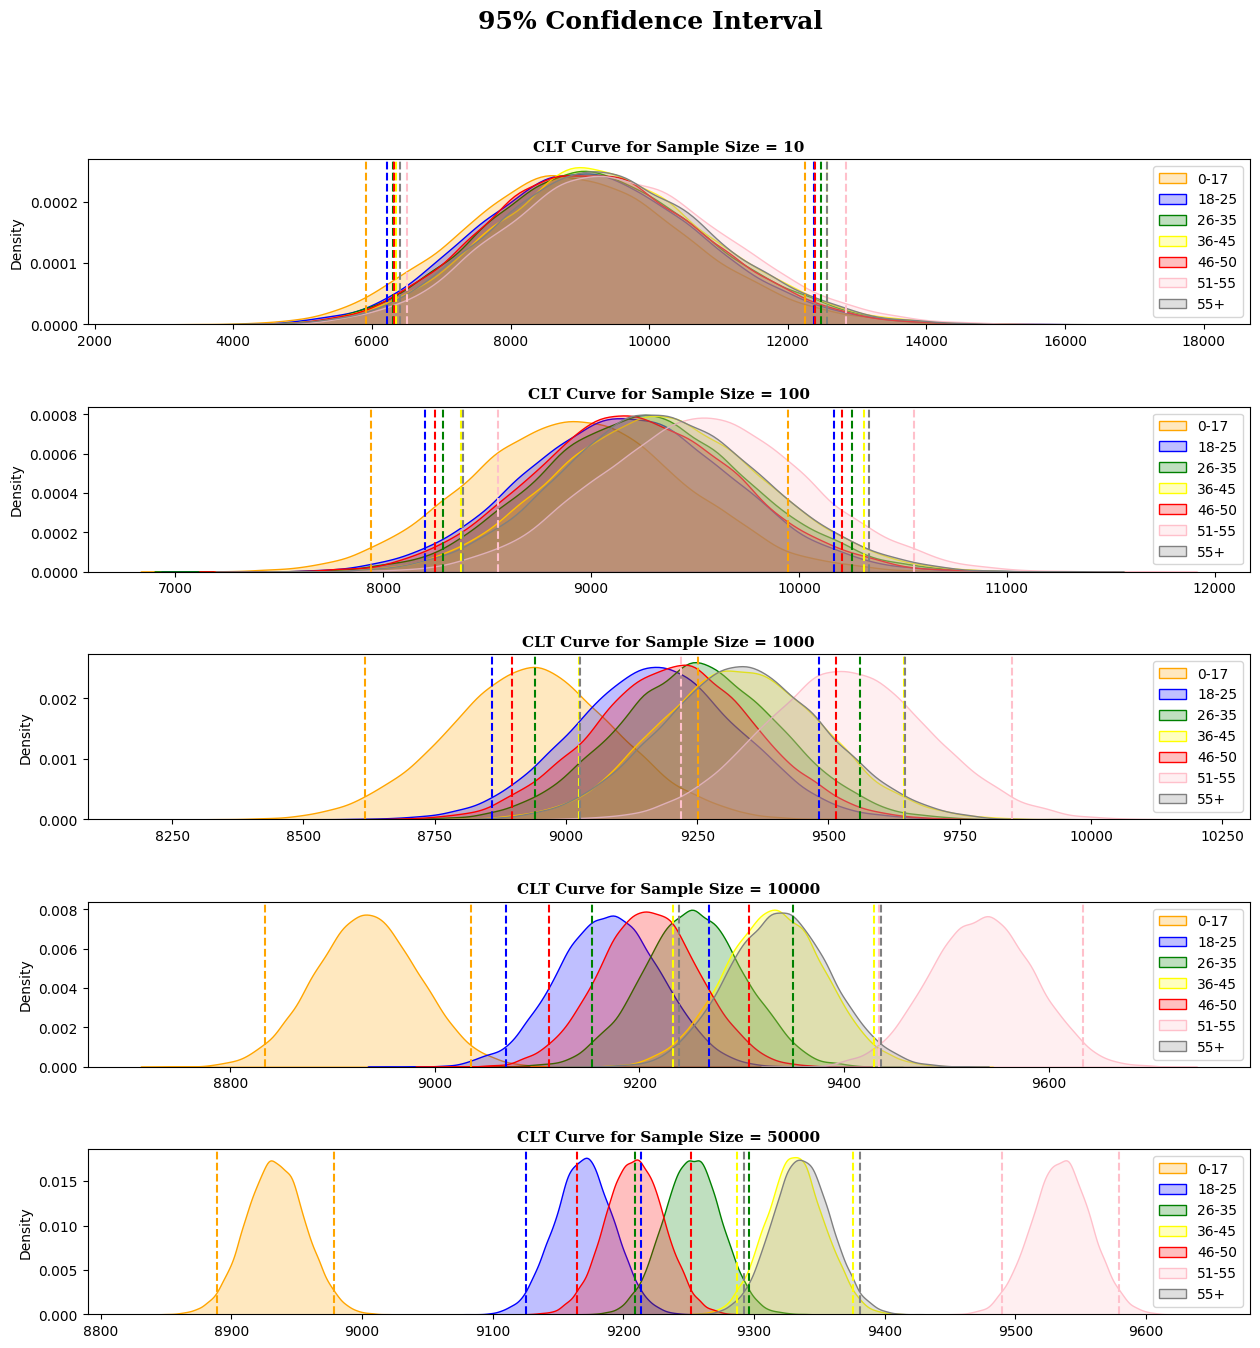

In [150]:
a_samples, b_samples , c_samples, d_samples, e_samples, f_samples, g_samples = plot(95)

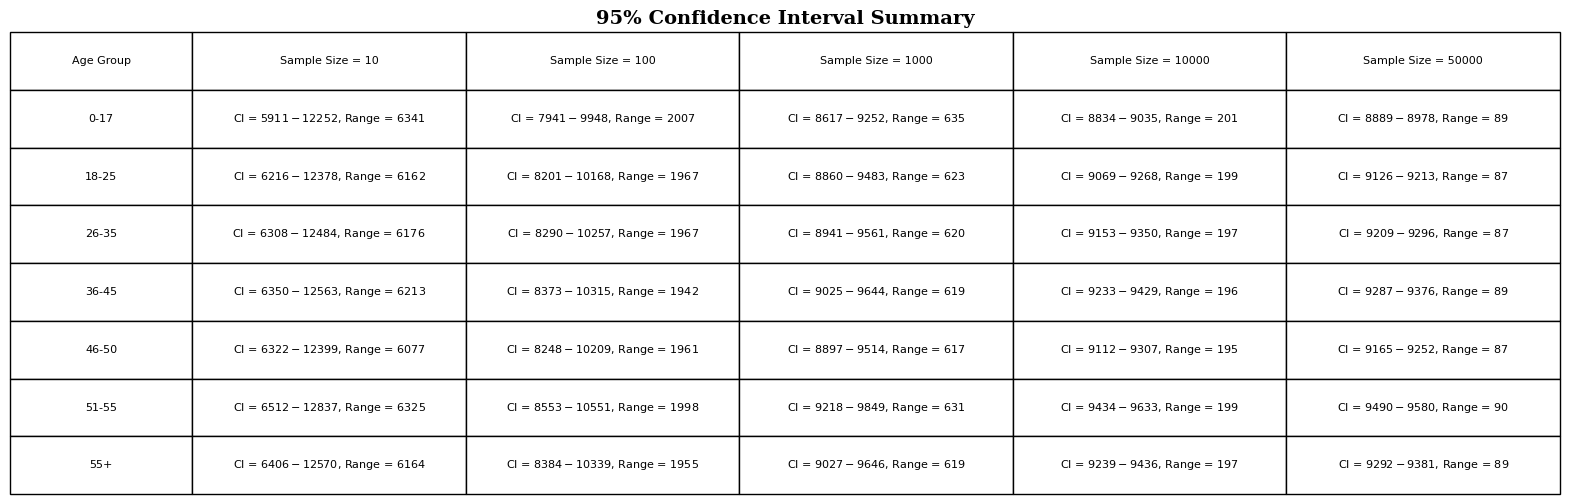

In [151]:
#setting the plot style
fig,ax = plt.subplots(figsize = (20,6))

#list for collecting ci for given cl
ci_1,ci_2,ci_3,ci_4,ci_5,ci_6,ci_7 = ['0-17'],['18-25'],['26-35'],['36-45'],['46-50'],['51-55'],['55+']

#finding ci for each sample size
#samples = [samples1,samples2,samples3,samples4,samples5,samples6,samples7]

samples = [(a_samples,ci_1),(b_samples,ci_2),(c_samples,ci_3),(d_samples,ci_4),(e_samples,ci_5),(f_samples,ci_6),(g_samples,ci_7)]

for s,c in samples:
    for i in s:
        s_range = confidence_interval(s[i],95)
        c.append(f"CI = ${s_range[0]:.0f} - ${s_range[1]:.0f}, Range = {(s_range[1] - s_range[0]):.0f}")


                                    #plotting the summary
#contents of the table
ci_info = [ci_1, ci_2, ci_3, ci_4, ci_5, ci_6, ci_7]

# plotting the table
table = ax.table(cellText=ci_info, cellLoc='center',
                 colLabels=['Age Group', 'Sample Size = 10', 'Sample Size = 100', 'Sample Size = 1000',
                            'Sample Size = 10000', 'Sample Size = 50000'],
                 colLoc='center', colWidths=[0.1, 0.15, 0.15, 0.15, 0.15, 0.15], bbox=[0, 0, 1, 1])


table.set_fontsize(13)

#removing axis
ax.axis('off')

#setting title
ax.set_title(f"95% Confidence Interval Summary",{'font':'serif', 'size':14,'weight':'bold'})

plt.show()

OBSERVATIONS
1. **Sample Size**: The analysis highlights the importance of sample size in estimating population parameters. It suggests that as the sample size increases, the confidence intervals become narrower and more precise. In business, this implies that larger sample sizes can provide more reliable insights and estimates.

2. **Confidence Intervals and Customer Spending Patterns**: From the above analysis, we can see that the confidence interval overlap for some of the age groups. We can club the average spending into following age groups:
  - 0 - 17: Customers in this age group have the lowest spending per transaction
  - 18 - 25, 26 - 35, 46 - 50: Customers in these age groups have overlapping confidence intervals indicating similar buying characteristics
  - 36 - 45, 55+: Customers in these age groups have overlapping confidence intervals indicating and similar spending patterns
  - 51 - 55: Customers in this age group have the highest spending per transaction

3. **Population Average**: We are 95% confident that the true population average for following age groups falls between the below range:
  - 0 - 17 = $ 8,888 to 8,979
  - 18 - 25 = $ 9,125 to 9,213
  - 26 - 35 = $ 9,209 to 9,297
  - 36 - 45 = $ 9,288 to 9,376
  - 46 - 50 = $ 9,165 to 9,253
  - 51 - 55 = $ 9,490 to 9,579
  - 55+ = $ 9,292 to 9,381

4. **How can Walmart leverage this conclusion to make changes or improvements?**
  - **Targeted Marketing**: Knowing that customers in the 0 - 17 age group have the lowest spending per transaction, Walmart can try to increase their spending per transaction by offering them more attractive discounts, coupons, or rewards programs. Walmart can also tailor their product selection and marketing strategies to appeal to the preferences and needs of this age group.
  - **Customer Segmentation**: Since customers in the 18 - 25, 26 - 35, and 46 - 50 age groups exhibit similar buying characteristics, and so do the customers in 36 - 45 and 55+, Walmart can optimize its product selection to cater to the preferences of these age groups. Also, Walmart can use this information to adjust their pricing strategies for different age groups.
  - **Premium Services**: Recognizing that customers in the 51 - 55 age group have the highest spending per transaction, Walmart can explore opportunities to enhance the shopping experience for this demographic. This might involve offering premium services, personalized recommendations, or loyalty programs that cater to the preferences and spending habits of this age group.

Recommendations
=================

**1. Target Male Shoppers**

*   Since male customers account for a significant portion of Black Friday sales and tend to spend more per transaction on average, Walmart should tailor its marketing strategies and product offerings to incentivize higher spending among male customers while ensuring competitive pricing for female-oriented products.

**2. Focus on 26 - 45 Age Group**

*   With the age group between 26 and 45 contributing to the majority of sales, Walmart should specifically cater to the preferences and needs of this demographic. This could include offering exclusive deals on products that are popular among this age group.

**3. Engage Younger Shoppers**

*   Knowing that customers in the 0 - 17 age group have the lowest spending per transaction, Walmart can try to increase their spending per transaction by offering them more attractive discounts, coupons, or rewards programs. It's essential to start building brand loyalty among younger consumers.

**4. Customer Segmentation**

*   Since customers in the 18 - 25, 26 - 35, and 46 - 50 age groups exhibit similar buying characteristics, and so do the customers in 36 - 45 and 55+, Walmart can optimize its product selection to cater to the preferences of these age groups. Also, Walmart can use this information to adjust their pricing strategies for different age groups.

**5. Enhance the 51 - 55 Age Group Shopping Experience**

*   Considering that customers aged 51 - 55 have the highest spending per transaction, Walmart offer them exclusive pre-sale access, special discount or provide personalized product recommendations for this age group. Walmart can also introduce loyalty programs specifically designed to reward and retain customers in the 51 - 55 age group.

**6. Post-Black Friday Engagement**

*   After Black Friday, walmart should engage with customers who made purchases by sending follow-up emails or offers for related products. This can help increase customer retention and encourage repeat business throughout the holiday season and beyond.